Written By Soner Kar

mail: sonerkar.eng@gmail.com

# IMPORTS

In [1]:
import tensorflow as tf

In [2]:
import scipy
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 
import random
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
for i in range(1, 51):
    filename_to_load = '%d.mat' % i
    mat = scipy.io.loadmat(filename_to_load)

    #mat = scipy.io.loadmat('38.mat')

    #In order to work on the data, we must convert the data to numpy array.
    data_of_mat = list(mat.items())
    array_of_mat = np.array(data_of_mat)

    df = pd.DataFrame(array_of_mat, columns=['Sub-band Type','Sample Values'])

    #What the data frame looks like
    #display(df)

    #Let's delete the first 3 lines of the data frame
    df.drop([0,1,2], axis=0, inplace=True)
    df = df.reindex([7,3,5,8,4,6])

    #Get indexes from 1 to 6 
    df.reset_index(inplace=True)

    #Delete the old index 3-8
    df.drop(['index'], axis=1, inplace = True)

    #display(df)  

    #Let's look Teta_CH7
    #print('\033[1m' + '\033[31m' + df.loc[4]['Sub-band Type'](For Example) + '\033[0m')
    #print(df.loc[4]['Sample Values'])

    # Check the shape of the lower band
    #print(f"Shape of {df.loc[4]['Sub-band Type']} -> {df.iloc[4,1].shape}")
    
    filename_to_save = 'df%d.pkl' % i
    df.to_pickle(filename_to_save)

## Data Preprocessıng

In [3]:
#load DataFrames
dfs_dict = {}
for i in range(1,51):
    filename_to_save = 'df%d.pkl' % i
    dfs_dict["df%s" %i] = pd.read_pickle(filename_to_save)

In [4]:
df_big = pd.DataFrame()

for i in range(1,51):
    df_big = df_big.append(dfs_dict["df%s" %i])

In [5]:
print('Shape of df_big ->',df_big.shape)
display(df_big)

#Reindexing
print('\nReindexing in progress...\n\n')

#Get indexes from 1 to 6 
df_big.reset_index(inplace=True)

#Delete the old index 3-8
df_big.drop(['index'], axis=1, inplace = True)

display(df_big)

Shape of df_big -> (300, 2)


,Sub-band Type,Sample Values
0,Teta_CH7,"[[-0.004084962147901478], [1.6717847888155337]..."
1,Alpha_CH7,"[[-0.003180670281219208], [-0.0331596507974786..."
2,Beta_CH7,"[[-0.0017131329025576994], [5.707026139248794]..."
3,Teta_CH8,"[[-0.0030409720956448274], [-1.771659988609280..."
4,Alpha_CH8,"[[-0.0023677892782807356], [-4.00923241426465]..."
...,...,...
1,Alpha_CH7,"[[-0.0013818352246098735], [33.56721389887232]..."
2,Beta_CH7,"[[-0.0007442668307578047], [85.74982419920684]..."
3,Teta_CH8,"[[-0.0006486486993644554], [-10.65437203477094..."
4,Alpha_CH8,"[[-0.0005050567342717388], [-11.75656247320132..."



Reindexing in progress...




,Sub-band Type,Sample Values
0,Teta_CH7,"[[-0.004084962147901478], [1.6717847888155337]..."
1,Alpha_CH7,"[[-0.003180670281219208], [-0.0331596507974786..."
2,Beta_CH7,"[[-0.0017131329025576994], [5.707026139248794]..."
3,Teta_CH8,"[[-0.0030409720956448274], [-1.771659988609280..."
4,Alpha_CH8,"[[-0.0023677892782807356], [-4.00923241426465]..."
...,...,...
295,Alpha_CH7,"[[-0.0013818352246098735], [33.56721389887232]..."
296,Beta_CH7,"[[-0.0007442668307578047], [85.74982419920684]..."
297,Teta_CH8,"[[-0.0006486486993644554], [-10.65437203477094..."
298,Alpha_CH8,"[[-0.0005050567342717388], [-11.75656247320132..."


In [6]:
#Creating of 'Person Number' Column 
personNumberList1 = list()
for i in range(1,51):
    personNumberList1.append(i)
    
personNumberList2 = list()
for i in range(1,51):
    personNumberList2.append(i)

personNumberList3 = list()
for i in range(1,51):
    personNumberList3.append(i)
    
personNumberList4 = list()
for i in range(1,51):
    personNumberList4.append(i)

personNumberList5 = list()
for i in range(1,51):
    personNumberList5.append(i)
    
personNumberList6 = list()
for i in range(1,51):
    personNumberList6.append(i)

    
personNumberList = personNumberList1 + personNumberList2 + personNumberList3 + personNumberList4 + personNumberList5 + personNumberList6
personNumberList.sort()
print('Person Number List:\n',personNumberList)
print(f'\nLength of personNumberList -> {len(personNumberList)}' )    
    
#Adding of 'Person Number' Column to DataFrame    
df_big['Person Number'] = personNumberList
    
print('\033[1m' + '\033[4m' + '\033[31m' + '\n↓ df_big Last Version ↓ ' + '\033[0m')
display(df_big)

Person Number List:
 [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 

,Sub-band Type,Sample Values,Person Number
0,Teta_CH7,"[[-0.004084962147901478], [1.6717847888155337]...",1
1,Alpha_CH7,"[[-0.003180670281219208], [-0.0331596507974786...",1
2,Beta_CH7,"[[-0.0017131329025576994], [5.707026139248794]...",1
3,Teta_CH8,"[[-0.0030409720956448274], [-1.771659988609280...",1
4,Alpha_CH8,"[[-0.0023677892782807356], [-4.00923241426465]...",1
...,...,...,...
295,Alpha_CH7,"[[-0.0013818352246098735], [33.56721389887232]...",50
296,Beta_CH7,"[[-0.0007442668307578047], [85.74982419920684]...",50
297,Teta_CH8,"[[-0.0006486486993644554], [-10.65437203477094...",50
298,Alpha_CH8,"[[-0.0005050567342717388], [-11.75656247320132...",50


In [7]:
#Let's say 'df' instead of 'df_big' from now on, for ease of writing code
df = df_big

In [8]:
#How to reach a row of Sample Values, following code is for example of it
df['Sample Values'][2] #this is the 2. row of the Sample Values 

array([[-1.71313290e-03],
       [ 5.70702614e+00],
       [ 9.51071679e+00],
       ...,
       [-2.03804358e+01],
       [-1.21274871e+01],
       [-1.68441579e-03]])

In [9]:
#Let's look at a short information of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sub-band Type  300 non-null    object
 1   Sample Values  300 non-null    object
 2   Person Number  300 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


In [10]:
#Let's get detail information about the DataFrame
display(df['Sample Values'].describe(),'Person Number')

count                                                   300
unique                                                  300
top       [[-0.006584814112599448], [-4.83586173107352],...
freq                                                      1
Name: Sample Values, dtype: object

'Person Number'

In [11]:
display(df['Person Number'].describe())

count    300.000000
mean      25.500000
std       14.454981
min        1.000000
25%       13.000000
50%       25.500000
75%       38.000000
max       50.000000
Name: Person Number, dtype: float64

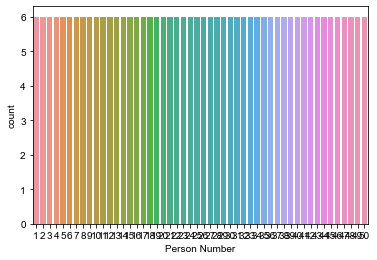

In [12]:
sns.countplot(x='Person Number', data=df)
sns.set(rc = {'figure.figsize':(20,8)})

Each of the 50 people has 6 sub-bands, as it should be.

In [13]:
df = pd.DataFrame(data=df, index=np.arange(3700))
display(df)

,Sub-band Type,Sample Values,Person Number
0,Teta_CH7,"[[-0.004084962147901478], [1.6717847888155337]...",1.0
1,Alpha_CH7,"[[-0.003180670281219208], [-0.0331596507974786...",1.0
2,Beta_CH7,"[[-0.0017131329025576994], [5.707026139248794]...",1.0
3,Teta_CH8,"[[-0.0030409720956448274], [-1.771659988609280...",1.0
4,Alpha_CH8,"[[-0.0023677892782807356], [-4.00923241426465]...",1.0
...,...,...,...
3695,NaN,NaN,NaN
3696,NaN,NaN,NaN
3697,NaN,NaN,NaN
3698,NaN,NaN,NaN


In [14]:
#Changing of 'Person Number' Column
list1 = list()
list_person_number = list()
for i in range(1,51):
    list1 = [i] * 74
    list_person_number += list1

print(f'Length of list_person_number -> {len(list_person_number)}')

df['Person Number'] = list_person_number
display(df)

Length of list_person_number -> 3700


,Sub-band Type,Sample Values,Person Number
0,Teta_CH7,"[[-0.004084962147901478], [1.6717847888155337]...",1
1,Alpha_CH7,"[[-0.003180670281219208], [-0.0331596507974786...",1
2,Beta_CH7,"[[-0.0017131329025576994], [5.707026139248794]...",1
3,Teta_CH8,"[[-0.0030409720956448274], [-1.771659988609280...",1
4,Alpha_CH8,"[[-0.0023677892782807356], [-4.00923241426465]...",1
...,...,...,...
3695,NaN,NaN,50
3696,NaN,NaN,50
3697,NaN,NaN,50
3698,NaN,NaN,50


In [15]:
df['CH7_Teta']  = ""
df['CH7_Alpha'] = ""
df['CH7_Beta']  = ""
df['CH8_Teta']  = ""
df['CH8_Alpha'] = ""
df['CH8_Beta']  = ""

display(df)

,Sub-band Type,Sample Values,Person Number,CH7_Teta,CH7_Alpha,CH7_Beta,CH8_Teta,CH8_Alpha,CH8_Beta
0,Teta_CH7,"[[-0.004084962147901478], [1.6717847888155337]...",1,,,,,,
1,Alpha_CH7,"[[-0.003180670281219208], [-0.0331596507974786...",1,,,,,,
2,Beta_CH7,"[[-0.0017131329025576994], [5.707026139248794]...",1,,,,,,
3,Teta_CH8,"[[-0.0030409720956448274], [-1.771659988609280...",1,,,,,,
4,Alpha_CH8,"[[-0.0023677892782807356], [-4.00923241426465]...",1,,,,,,
...,...,...,...,...,...,...,...,...,...
3695,NaN,NaN,50,,,,,,
3696,NaN,NaN,50,,,,,,
3697,NaN,NaN,50,,,,,,
3698,NaN,NaN,50,,,,,,


In [16]:
list_CH7_Teta = []
list_CH7_Alpha = []
list_CH7_Beta = []
list_CH8_Teta = []
list_CH8_Alpha = []
list_CH8_Beta = []

In [17]:
for i in range(0,300,6):
    list_CH7_Teta += np.split(df['Sample Values'][i],(37000/500))
df['CH7_Teta'] = list_CH7_Teta

for i in range(1,300,6):
    list_CH7_Alpha += np.split(df['Sample Values'][i],(37000/500))
df['CH7_Alpha'] = list_CH7_Alpha

for i in range(2,300,6):
    list_CH7_Beta += np.split(df['Sample Values'][i],(37000/500))
df['CH7_Beta'] = list_CH7_Beta

for i in range(3,300,6):
    list_CH8_Teta += np.split(df['Sample Values'][i],(37000/500))
df['CH8_Teta'] = list_CH8_Teta

for i in range(4,300,6):
    list_CH8_Alpha += np.split(df['Sample Values'][i],(37000/500))
df['CH8_Alpha'] = list_CH8_Alpha

for i in range(5,300,6):
    list_CH8_Beta += np.split(df['Sample Values'][i],(37000/500))
df['CH8_Beta'] = list_CH8_Beta

display(df)

,Sub-band Type,Sample Values,Person Number,CH7_Teta,CH7_Alpha,CH7_Beta,CH8_Teta,CH8_Alpha,CH8_Beta
0,Teta_CH7,"[[-0.004084962147901478], [1.6717847888155337]...",1,"[[-0.004084962147901478], [1.6717847888155337]...","[[-0.003180670281219208], [-0.0331596507974786...","[[-0.0017131329025576994], [5.707026139248794]...","[[-0.0030409720956448274], [-1.771659988609280...","[[-0.0023677892782807356], [-4.00923241426465]...","[[-0.001275309088556036], [-11.791365504759348..."
1,Alpha_CH7,"[[-0.003180670281219208], [-0.0331596507974786...",1,"[[-0.26722691219993416], [-0.48016212523268254...","[[-1.1142004228107798], [-1.834641975119802], ...","[[-2.790887975805429], [-5.663769345147099], [...","[[-3.073462324603013], [-2.2986639365842163], ...","[[1.0912504854944716], [1.8986157359294653], [...","[[-3.5625187991072855], [-3.2274285461881567],..."
2,Beta_CH7,"[[-0.0017131329025576994], [5.707026139248794]...",1,"[[0.6233524303716272], [0.9595295442967361], [...","[[-4.54339385040624], [-3.11516664501373], [-1...","[[-1.9829723424722423], [1.359740346492062], [...","[[5.277788840912537], [5.6112329121359386], [5...","[[-7.117677651012773], [-6.127317908358047], [...","[[-2.3665878996649843], [2.410672764974865], [..."
3,Teta_CH8,"[[-0.0030409720956448274], [-1.771659988609280...",1,"[[1.2584180307260189], [2.22122227024731], [3....","[[3.415530631139729], [4.458146318823448], [5....","[[-0.6062430036950939], [1.1524222105953938], ...","[[2.7708221390923593], [3.4935549442629297], [...","[[1.6960532088332878], [2.554345196308095], [3...","[[-4.152121644211854], [-2.651557223823981], [..."
4,Alpha_CH8,"[[-0.0023677892782807356], [-4.00923241426465]...",1,"[[-10.458166249417605], [-10.065422150216731],...","[[-0.12767966477631895], [-1.166567543768434],...","[[-3.2194848246447036], [-3.8009108326878693],...","[[-10.28963130592839], [-9.964741555937687], [...","[[-5.050024904510659], [-5.057874040084894], [...","[[-1.6829725217711358], [-1.5721923178082216],..."
...,...,...,...,...,...,...,...,...,...
3695,NaN,NaN,50,"[[7.744340034958487], [9.202419646984747], [10...","[[3.725214774904042], [-0.17425329168250453], ...","[[3.719823844765703], [6.936044916931747], [7....","[[0.8203096610582126], [2.3587921115841293], [...","[[7.670331636768958], [7.987054707847693], [7....","[[1.2718505158204823], [-0.0758172079159657], ..."
3696,NaN,NaN,50,"[[6.713630680799007], [6.860620910462033], [6....","[[7.115821617997293], [9.728340972397428], [11...","[[-0.7386496950241462], [-2.5904007437872627],...","[[1.5075306536915352], [2.566925603444694], [3...","[[-1.1377725724074965], [-1.60066969987679], [...","[[2.7614517175779265], [0.7476342850677369], [..."
3697,NaN,NaN,50,"[[7.036796365167894], [7.105769519620418], [6....","[[-3.9925726959398613], [-3.942736331122514], ...","[[-3.542623937488306], [-5.022899920715326], [...","[[-9.373913640782813], [-8.886432869057487], [...","[[-11.995680510110963], [-13.222345154555759],...","[[0.3644908802028761], [-3.8394751985126083], ..."
3698,NaN,NaN,50,"[[-4.315815859691411], [-4.562782675640729], [...","[[20.35107910252717], [18.48006872815578], [15...","[[-5.119408145776214], [-7.202219896652009], [...","[[-1.7375886659760882], [-1.479192856254134], ...","[[16.94600088992131], [15.970698286360255], [1...","[[-8.507579066900803], [-7.761143766990539], [..."


In [18]:
df.drop(['Sub-band Type','Sample Values'], axis=1, inplace=True)
display(df)

,Person Number,CH7_Teta,CH7_Alpha,CH7_Beta,CH8_Teta,CH8_Alpha,CH8_Beta
0,1,"[[-0.004084962147901478], [1.6717847888155337]...","[[-0.003180670281219208], [-0.0331596507974786...","[[-0.0017131329025576994], [5.707026139248794]...","[[-0.0030409720956448274], [-1.771659988609280...","[[-0.0023677892782807356], [-4.00923241426465]...","[[-0.001275309088556036], [-11.791365504759348..."
1,1,"[[-0.26722691219993416], [-0.48016212523268254...","[[-1.1142004228107798], [-1.834641975119802], ...","[[-2.790887975805429], [-5.663769345147099], [...","[[-3.073462324603013], [-2.2986639365842163], ...","[[1.0912504854944716], [1.8986157359294653], [...","[[-3.5625187991072855], [-3.2274285461881567],..."
2,1,"[[0.6233524303716272], [0.9595295442967361], [...","[[-4.54339385040624], [-3.11516664501373], [-1...","[[-1.9829723424722423], [1.359740346492062], [...","[[5.277788840912537], [5.6112329121359386], [5...","[[-7.117677651012773], [-6.127317908358047], [...","[[-2.3665878996649843], [2.410672764974865], [..."
3,1,"[[1.2584180307260189], [2.22122227024731], [3....","[[3.415530631139729], [4.458146318823448], [5....","[[-0.6062430036950939], [1.1524222105953938], ...","[[2.7708221390923593], [3.4935549442629297], [...","[[1.6960532088332878], [2.554345196308095], [3...","[[-4.152121644211854], [-2.651557223823981], [..."
4,1,"[[-10.458166249417605], [-10.065422150216731],...","[[-0.12767966477631895], [-1.166567543768434],...","[[-3.2194848246447036], [-3.8009108326878693],...","[[-10.28963130592839], [-9.964741555937687], [...","[[-5.050024904510659], [-5.057874040084894], [...","[[-1.6829725217711358], [-1.5721923178082216],..."
...,...,...,...,...,...,...,...
3695,50,"[[7.744340034958487], [9.202419646984747], [10...","[[3.725214774904042], [-0.17425329168250453], ...","[[3.719823844765703], [6.936044916931747], [7....","[[0.8203096610582126], [2.3587921115841293], [...","[[7.670331636768958], [7.987054707847693], [7....","[[1.2718505158204823], [-0.0758172079159657], ..."
3696,50,"[[6.713630680799007], [6.860620910462033], [6....","[[7.115821617997293], [9.728340972397428], [11...","[[-0.7386496950241462], [-2.5904007437872627],...","[[1.5075306536915352], [2.566925603444694], [3...","[[-1.1377725724074965], [-1.60066969987679], [...","[[2.7614517175779265], [0.7476342850677369], [..."
3697,50,"[[7.036796365167894], [7.105769519620418], [6....","[[-3.9925726959398613], [-3.942736331122514], ...","[[-3.542623937488306], [-5.022899920715326], [...","[[-9.373913640782813], [-8.886432869057487], [...","[[-11.995680510110963], [-13.222345154555759],...","[[0.3644908802028761], [-3.8394751985126083], ..."
3698,50,"[[-4.315815859691411], [-4.562782675640729], [...","[[20.35107910252717], [18.48006872815578], [15...","[[-5.119408145776214], [-7.202219896652009], [...","[[-1.7375886659760882], [-1.479192856254134], ...","[[16.94600088992131], [15.970698286360255], [1...","[[-8.507579066900803], [-7.761143766990539], [..."


## Assign x and y

In [19]:
y = df['Person Number'].values
x = df.drop('Person Number', axis=1).values

In [20]:
c0=[]
c1=[]
c2=[]
c3=[]
c4=[]
c5=[]
for i in x:

  # print(i[0].shape)
  c0.append(i[0]) 
  c1.append(i[1]) 
  c2.append(i[2]) 
  c3.append(i[3]) 
  c4.append(i[4]) 
  c5.append(i[5]) 



c0=np.asarray(c0)
c1=np.asarray(c1)
c2=np.asarray(c2)
c3=np.asarray(c3)
c4=np.asarray(c4)
c5=np.asarray(c5)


print(c1.shape)



x=np.stack([c0, c1, c2,c3,c4,c5], axis=2)
x=np.squeeze(x, axis=3)
print(x.shape)

(3700, 500, 1)
(3700, 500, 6)


In [21]:
#OHE
y=y.reshape(-1,1)
ohe = preprocessing.OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print(y)
print(y.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(3700, 50)


In [22]:
print(x.shape)
print(y.shape)

(3700, 500, 6)
(3700, 50)


In [23]:
x=x.reshape(3700,3000)

## Train-Test Split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=8)

## INSPECT DATA

In [41]:
model = Sequential()

model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))

model.add(Dense(units=50, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), epochs=150, verbose=1);

Epoch 1/150
93/93 [==============================] - 4s 12ms/step - loss: 4.4947 - accuracy: 0.0139 - val_loss: 3.9248 - val_accuracy: 0.0257
Epoch 2/150
93/93 [==============================] - 0s 2ms/step - loss: 4.1453 - accuracy: 0.0280 - val_loss: 3.9794 - val_accuracy: 0.0243
Epoch 3/150
93/93 [==============================] - 0s 2ms/step - loss: 4.1042 - accuracy: 0.0345 - val_loss: 3.9347 - val_accuracy: 0.0311
Epoch 4/150
93/93 [==============================] - 0s 2ms/step - loss: 3.8778 - accuracy: 0.0502 - val_loss: 3.8914 - val_accuracy: 0.0405
Epoch 5/150
93/93 [==============================] - 0s 2ms/step - loss: 3.9027 - accuracy: 0.0547 - val_loss: 3.9050 - val_accuracy: 0.0432
Epoch 6/150
93/93 [==============================] - 0s 2ms/step - loss: 4.0177 - accuracy: 0.0528 - val_loss: 3.9311 - val_accuracy: 0.0365
Epoch 7/150
93/93 [==============================] - 0s 2ms/step - loss: 3.8511 - accuracy: 0.0489 - val_loss: 3.8565 - val_accuracy: 0.0541
Epoch 8/150


Epoch 59/150
93/93 [==============================] - 0s 2ms/step - loss: 1.9610 - accuracy: 0.4062 - val_loss: 6.7417 - val_accuracy: 0.0797
Epoch 60/150
93/93 [==============================] - 0s 2ms/step - loss: 2.3776 - accuracy: 0.3045 - val_loss: 5.7072 - val_accuracy: 0.0878
Epoch 61/150
93/93 [==============================] - 0s 2ms/step - loss: 1.9659 - accuracy: 0.4038 - val_loss: 5.9551 - val_accuracy: 0.0797
Epoch 62/150
93/93 [==============================] - 0s 2ms/step - loss: 1.7637 - accuracy: 0.4345 - val_loss: 6.4492 - val_accuracy: 0.0905
Epoch 63/150
93/93 [==============================] - 0s 2ms/step - loss: 1.6100 - accuracy: 0.4741 - val_loss: 6.8136 - val_accuracy: 0.0878
Epoch 64/150
93/93 [==============================] - 0s 2ms/step - loss: 1.5726 - accuracy: 0.4961 - val_loss: 6.9979 - val_accuracy: 0.0892
Epoch 65/150
93/93 [==============================] - 0s 2ms/step - loss: 1.5584 - accuracy: 0.5053 - val_loss: 7.2882 - val_accuracy: 0.0824
Epoch 

Text(0.5, 1.0, 'Model Accuracy')

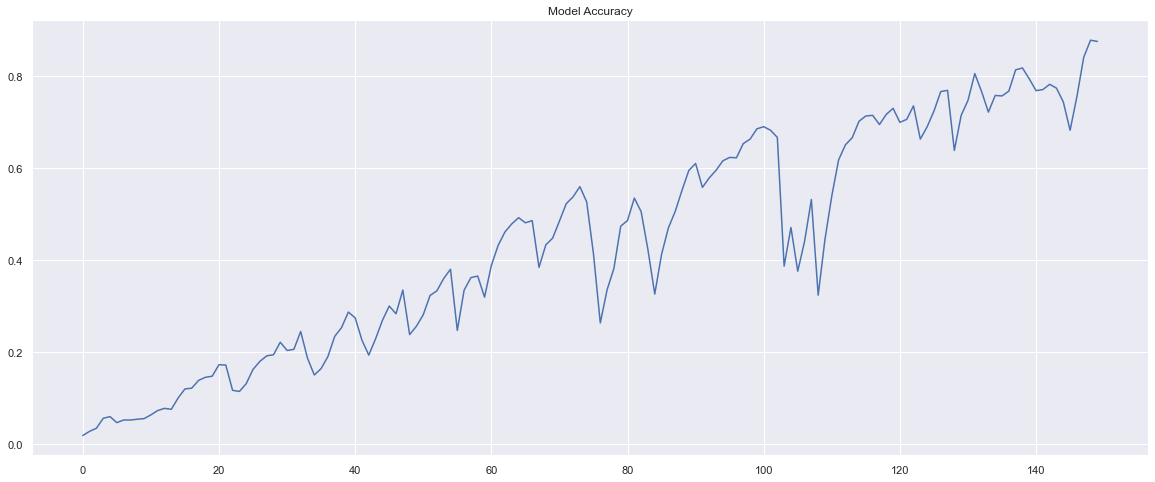

In [42]:
#Accuracy_score graph of model
plt.plot(model.history.history['accuracy'])
plt.title('Model Accuracy')

<AxesSubplot:>

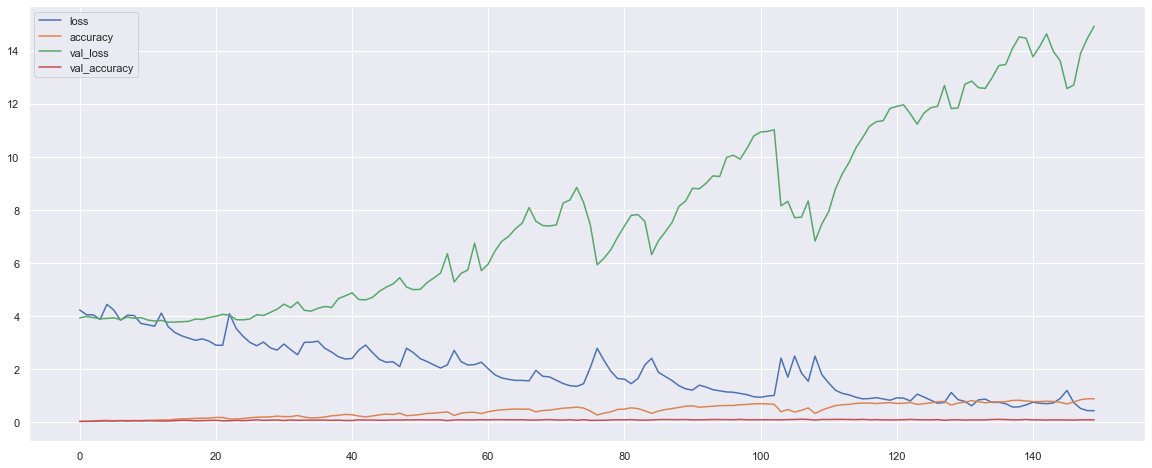

In [43]:
lostData = pd.DataFrame(model.history.history)
lostData.plot()

In [87]:
y_pred = model.predict(x_test)
accuracy_score(np.argmax(y_test,1),np.argmax(y_pred,1))

0.07432432432432433

## MODEL_V2

In [150]:
model2 = Sequential()

model2.add(Dense(40,activation="relu"))
model2.add(Dropout(0.1))
model2.add(Dense(40,activation="relu"))
model2.add(Dropout(0.1))
model2.add(Dense(40,activation="relu"))
model2.add(Dropout(0.1))
model2.add(Dense(40,activation="relu"))
model2.add(Dropout(0.1))
model2.add(Dense(40,activation="relu"))
model2.add(Dropout(0.1))
model2.add(Dense(units=50, activation='softmax'))

model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

model2.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), epochs=3600, verbose=1);

Epoch 1/3600
93/93 [==============================] - 2s 3ms/step - loss: 23.8855 - accuracy: 0.0190 - val_loss: 5.2644 - val_accuracy: 0.0203
Epoch 2/3600
93/93 [==============================] - 0s 2ms/step - loss: 6.6290 - accuracy: 0.0181 - val_loss: 4.6974 - val_accuracy: 0.0203
Epoch 3/3600
93/93 [==============================] - 0s 2ms/step - loss: 8.4521 - accuracy: 0.0238 - val_loss: 4.5174 - val_accuracy: 0.0230
Epoch 4/3600
93/93 [==============================] - 0s 2ms/step - loss: 5.4039 - accuracy: 0.0281 - val_loss: 4.2258 - val_accuracy: 0.0216
Epoch 5/3600
93/93 [==============================] - 0s 2ms/step - loss: 5.8724 - accuracy: 0.0352 - val_loss: 4.2261 - val_accuracy: 0.0284
Epoch 6/3600
93/93 [==============================] - 0s 2ms/step - loss: 7.5936 - accuracy: 0.0290 - val_loss: 4.0736 - val_accuracy: 0.0162
Epoch 7/3600
93/93 [==============================] - 0s 2ms/step - loss: 4.6968 - accuracy: 0.0387 - val_loss: 4.0593 - val_accuracy: 0.0284
Epoch

93/93 [==============================] - 0s 2ms/step - loss: 3.3640 - accuracy: 0.0994 - val_loss: 3.6880 - val_accuracy: 0.0608
Epoch 116/3600
93/93 [==============================] - 0s 2ms/step - loss: 3.5041 - accuracy: 0.0884 - val_loss: 3.6656 - val_accuracy: 0.0608
Epoch 117/3600
93/93 [==============================] - 0s 2ms/step - loss: 3.3183 - accuracy: 0.1005 - val_loss: 3.6685 - val_accuracy: 0.0581
Epoch 118/3600
93/93 [==============================] - 0s 2ms/step - loss: 3.6398 - accuracy: 0.1006 - val_loss: 3.6542 - val_accuracy: 0.0595
Epoch 119/3600
93/93 [==============================] - 0s 2ms/step - loss: 3.3138 - accuracy: 0.0942 - val_loss: 3.6561 - val_accuracy: 0.0770
Epoch 120/3600
93/93 [==============================] - 0s 2ms/step - loss: 3.2753 - accuracy: 0.1191 - val_loss: 3.6593 - val_accuracy: 0.0919
Epoch 121/3600
93/93 [==============================] - 0s 2ms/step - loss: 3.2731 - accuracy: 0.1097 - val_loss: 3.6497 - val_accuracy: 0.0865
Epoch 1

Epoch 172/3600
93/93 [==============================] - 0s 3ms/step - loss: 2.9884 - accuracy: 0.1435 - val_loss: 3.6790 - val_accuracy: 0.0730
Epoch 173/3600
93/93 [==============================] - 0s 2ms/step - loss: 3.0035 - accuracy: 0.1479 - val_loss: 3.6869 - val_accuracy: 0.0608
Epoch 174/3600
93/93 [==============================] - 0s 2ms/step - loss: 3.0771 - accuracy: 0.1434 - val_loss: 3.6825 - val_accuracy: 0.0743
Epoch 175/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.9445 - accuracy: 0.1347 - val_loss: 3.6539 - val_accuracy: 0.0770
Epoch 176/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.9656 - accuracy: 0.1443 - val_loss: 3.6558 - val_accuracy: 0.0770
Epoch 177/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.9053 - accuracy: 0.1600 - val_loss: 3.6446 - val_accuracy: 0.0770
Epoch 178/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.8989 - accuracy: 0.1521 - val_loss: 3.7037 - val_accuracy:

Epoch 229/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.7601 - accuracy: 0.1940 - val_loss: 4.0640 - val_accuracy: 0.0716
Epoch 230/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.8971 - accuracy: 0.1636 - val_loss: 3.8261 - val_accuracy: 0.0757
Epoch 231/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.8191 - accuracy: 0.1647 - val_loss: 3.8414 - val_accuracy: 0.0703
Epoch 232/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.8411 - accuracy: 0.1867 - val_loss: 3.8674 - val_accuracy: 0.0676
Epoch 233/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.9256 - accuracy: 0.1837 - val_loss: 3.8312 - val_accuracy: 0.0676
Epoch 234/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.8354 - accuracy: 0.1752 - val_loss: 3.8605 - val_accuracy: 0.0662
Epoch 235/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.7688 - accuracy: 0.1939 - val_loss: 3.8637 - val_accuracy:

Epoch 286/3600
93/93 [==============================] - 0s 3ms/step - loss: 2.5943 - accuracy: 0.2296 - val_loss: 4.3072 - val_accuracy: 0.0824
Epoch 287/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.5423 - accuracy: 0.2350 - val_loss: 4.2660 - val_accuracy: 0.0905
Epoch 288/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.5093 - accuracy: 0.2430 - val_loss: 4.2040 - val_accuracy: 0.0851
Epoch 289/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.5626 - accuracy: 0.2197 - val_loss: 4.2214 - val_accuracy: 0.0770
Epoch 290/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.5553 - accuracy: 0.2363 - val_loss: 4.2536 - val_accuracy: 0.0892
Epoch 291/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.5366 - accuracy: 0.2426 - val_loss: 4.3025 - val_accuracy: 0.0851
Epoch 292/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.5060 - accuracy: 0.2453 - val_loss: 4.1410 - val_accuracy:

Epoch 343/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.4010 - accuracy: 0.2545 - val_loss: 4.3572 - val_accuracy: 0.0797
Epoch 344/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.3962 - accuracy: 0.2524 - val_loss: 4.2541 - val_accuracy: 0.0824
Epoch 345/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.3627 - accuracy: 0.2639 - val_loss: 4.3113 - val_accuracy: 0.0959
Epoch 346/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.4813 - accuracy: 0.2579 - val_loss: 4.2017 - val_accuracy: 0.0838
Epoch 347/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.4722 - accuracy: 0.2488 - val_loss: 4.3431 - val_accuracy: 0.0919
Epoch 348/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.4017 - accuracy: 0.2691 - val_loss: 4.2428 - val_accuracy: 0.0757
Epoch 349/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.3897 - accuracy: 0.2632 - val_loss: 4.3081 - val_accuracy:

Epoch 400/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.2955 - accuracy: 0.2880 - val_loss: 4.3427 - val_accuracy: 0.0784
Epoch 401/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.3288 - accuracy: 0.2974 - val_loss: 4.3395 - val_accuracy: 0.0811
Epoch 402/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.3380 - accuracy: 0.2757 - val_loss: 4.3597 - val_accuracy: 0.0905
Epoch 403/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.3142 - accuracy: 0.2935 - val_loss: 4.3365 - val_accuracy: 0.0959
Epoch 404/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.2596 - accuracy: 0.2952 - val_loss: 4.2904 - val_accuracy: 0.0851
Epoch 405/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.3141 - accuracy: 0.2756 - val_loss: 4.2954 - val_accuracy: 0.0811
Epoch 406/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.2979 - accuracy: 0.2928 - val_loss: 4.2687 - val_accuracy:

Epoch 457/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.2348 - accuracy: 0.3117 - val_loss: 4.5078 - val_accuracy: 0.0865
Epoch 458/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.2606 - accuracy: 0.2943 - val_loss: 4.4875 - val_accuracy: 0.0892
Epoch 459/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.2518 - accuracy: 0.3132 - val_loss: 4.3853 - val_accuracy: 0.0959
Epoch 460/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.3511 - accuracy: 0.2925 - val_loss: 4.2672 - val_accuracy: 0.0838
Epoch 461/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.2219 - accuracy: 0.3208 - val_loss: 4.4475 - val_accuracy: 0.1054
Epoch 462/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.2575 - accuracy: 0.2962 - val_loss: 4.4042 - val_accuracy: 0.0851
Epoch 463/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.2200 - accuracy: 0.3146 - val_loss: 4.4883 - val_accuracy:

Epoch 514/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.2342 - accuracy: 0.3070 - val_loss: 4.5628 - val_accuracy: 0.0851
Epoch 515/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.1550 - accuracy: 0.3147 - val_loss: 4.5787 - val_accuracy: 0.0797
Epoch 516/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.1439 - accuracy: 0.3234 - val_loss: 4.5558 - val_accuracy: 0.0784
Epoch 517/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.1788 - accuracy: 0.3311 - val_loss: 4.5412 - val_accuracy: 0.0811
Epoch 518/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.1546 - accuracy: 0.3277 - val_loss: 4.5641 - val_accuracy: 0.0851
Epoch 519/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.1875 - accuracy: 0.3245 - val_loss: 4.6308 - val_accuracy: 0.0811
Epoch 520/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.1438 - accuracy: 0.3416 - val_loss: 4.6182 - val_accuracy:

Epoch 571/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.1299 - accuracy: 0.3634 - val_loss: 4.8315 - val_accuracy: 0.1014
Epoch 572/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0627 - accuracy: 0.3464 - val_loss: 4.6767 - val_accuracy: 0.0946
Epoch 573/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.3113 - accuracy: 0.3430 - val_loss: 4.6973 - val_accuracy: 0.1000
Epoch 574/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.1167 - accuracy: 0.3414 - val_loss: 4.6882 - val_accuracy: 0.0824
Epoch 575/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0605 - accuracy: 0.3578 - val_loss: 4.6295 - val_accuracy: 0.0959
Epoch 576/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0202 - accuracy: 0.3664 - val_loss: 4.6445 - val_accuracy: 0.0959
Epoch 577/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0974 - accuracy: 0.3433 - val_loss: 4.5779 - val_accuracy:

Epoch 628/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.1875 - accuracy: 0.3404 - val_loss: 4.7240 - val_accuracy: 0.0784
Epoch 629/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.1387 - accuracy: 0.3450 - val_loss: 4.8002 - val_accuracy: 0.0824
Epoch 630/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0913 - accuracy: 0.3546 - val_loss: 5.0474 - val_accuracy: 0.0797
Epoch 631/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.4696 - accuracy: 0.3358 - val_loss: 4.7162 - val_accuracy: 0.1041
Epoch 632/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.1409 - accuracy: 0.3268 - val_loss: 4.7827 - val_accuracy: 0.0892
Epoch 633/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0972 - accuracy: 0.3379 - val_loss: 4.8410 - val_accuracy: 0.0824
Epoch 634/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.1713 - accuracy: 0.3287 - val_loss: 4.7160 - val_accuracy:

Epoch 685/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.1470 - accuracy: 0.3580 - val_loss: 4.9761 - val_accuracy: 0.0986
Epoch 686/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.2042 - accuracy: 0.3643 - val_loss: 4.8777 - val_accuracy: 0.0851
Epoch 687/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0932 - accuracy: 0.3478 - val_loss: 4.8748 - val_accuracy: 0.1000
Epoch 688/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.2065 - accuracy: 0.3707 - val_loss: 4.7751 - val_accuracy: 0.0851
Epoch 689/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0354 - accuracy: 0.3724 - val_loss: 4.8645 - val_accuracy: 0.1027
Epoch 690/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.2321 - accuracy: 0.3644 - val_loss: 4.7443 - val_accuracy: 0.1054
Epoch 691/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0386 - accuracy: 0.3629 - val_loss: 4.8876 - val_accuracy:

Epoch 742/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0272 - accuracy: 0.3817 - val_loss: 5.1160 - val_accuracy: 0.0973
Epoch 743/3600
93/93 [==============================] - 0s 3ms/step - loss: 2.0464 - accuracy: 0.3746 - val_loss: 4.8730 - val_accuracy: 0.0986
Epoch 744/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0032 - accuracy: 0.3982 - val_loss: 4.8207 - val_accuracy: 0.1068
Epoch 745/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9775 - accuracy: 0.3901 - val_loss: 4.8719 - val_accuracy: 0.1054
Epoch 746/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0234 - accuracy: 0.3703 - val_loss: 4.9909 - val_accuracy: 0.1095
Epoch 747/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9688 - accuracy: 0.3936 - val_loss: 4.9867 - val_accuracy: 0.1095
Epoch 748/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9486 - accuracy: 0.3997 - val_loss: 4.9820 - val_accuracy:

Epoch 799/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.1279 - accuracy: 0.3420 - val_loss: 4.8406 - val_accuracy: 0.1027
Epoch 800/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0240 - accuracy: 0.3663 - val_loss: 4.8117 - val_accuracy: 0.0946
Epoch 801/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.5636 - accuracy: 0.3609 - val_loss: 4.9194 - val_accuracy: 0.0905
Epoch 802/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.2973 - accuracy: 0.3501 - val_loss: 4.8935 - val_accuracy: 0.0851
Epoch 803/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0509 - accuracy: 0.3611 - val_loss: 4.9443 - val_accuracy: 0.0811
Epoch 804/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9960 - accuracy: 0.3800 - val_loss: 4.9194 - val_accuracy: 0.0784
Epoch 805/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0318 - accuracy: 0.3772 - val_loss: 5.0083 - val_accuracy:

Epoch 856/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9725 - accuracy: 0.4039 - val_loss: 5.0612 - val_accuracy: 0.0757
Epoch 857/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.1431 - accuracy: 0.3764 - val_loss: 4.7979 - val_accuracy: 0.0959
Epoch 858/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0345 - accuracy: 0.3775 - val_loss: 4.9264 - val_accuracy: 0.0905
Epoch 859/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.3059 - accuracy: 0.3713 - val_loss: 4.9360 - val_accuracy: 0.0851
Epoch 860/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0100 - accuracy: 0.3635 - val_loss: 4.9571 - val_accuracy: 0.0878
Epoch 861/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0049 - accuracy: 0.3879 - val_loss: 4.8450 - val_accuracy: 0.1000
Epoch 862/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.1093 - accuracy: 0.3664 - val_loss: 4.8998 - val_accuracy:

Epoch 913/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9008 - accuracy: 0.4205 - val_loss: 4.9608 - val_accuracy: 0.0959
Epoch 914/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9093 - accuracy: 0.4099 - val_loss: 4.9833 - val_accuracy: 0.0905
Epoch 915/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9324 - accuracy: 0.4077 - val_loss: 5.0680 - val_accuracy: 0.0878
Epoch 916/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8591 - accuracy: 0.4308 - val_loss: 5.0140 - val_accuracy: 0.0932
Epoch 917/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9060 - accuracy: 0.4271 - val_loss: 5.1055 - val_accuracy: 0.0986
Epoch 918/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8526 - accuracy: 0.4224 - val_loss: 5.2191 - val_accuracy: 0.0784
Epoch 919/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0787 - accuracy: 0.3865 - val_loss: 5.0030 - val_accuracy:

Epoch 970/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9366 - accuracy: 0.3984 - val_loss: 5.0249 - val_accuracy: 0.0865
Epoch 971/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0401 - accuracy: 0.3820 - val_loss: 5.0811 - val_accuracy: 0.0784
Epoch 972/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9896 - accuracy: 0.3755 - val_loss: 4.9533 - val_accuracy: 0.0743
Epoch 973/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8833 - accuracy: 0.4206 - val_loss: 5.0020 - val_accuracy: 0.0784
Epoch 974/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9723 - accuracy: 0.4043 - val_loss: 4.9213 - val_accuracy: 0.0905
Epoch 975/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9618 - accuracy: 0.4011 - val_loss: 4.9719 - val_accuracy: 0.0770
Epoch 976/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9548 - accuracy: 0.3990 - val_loss: 4.9214 - val_accuracy:

Epoch 1027/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9109 - accuracy: 0.4081 - val_loss: 4.9440 - val_accuracy: 0.0811
Epoch 1028/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8975 - accuracy: 0.4250 - val_loss: 5.0139 - val_accuracy: 0.0851
Epoch 1029/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9191 - accuracy: 0.4139 - val_loss: 5.0416 - val_accuracy: 0.1041
Epoch 1030/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8780 - accuracy: 0.4106 - val_loss: 5.0326 - val_accuracy: 0.0824
Epoch 1031/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8902 - accuracy: 0.4201 - val_loss: 4.9887 - val_accuracy: 0.0986
Epoch 1032/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0257 - accuracy: 0.3855 - val_loss: 5.0073 - val_accuracy: 0.0743
Epoch 1033/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9268 - accuracy: 0.4102 - val_loss: 5.1457 - val_ac

93/93 [==============================] - 0s 2ms/step - loss: 1.8490 - accuracy: 0.4348 - val_loss: 5.3931 - val_accuracy: 0.0757
Epoch 1140/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8697 - accuracy: 0.4175 - val_loss: 5.2259 - val_accuracy: 0.0932
Epoch 1141/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8409 - accuracy: 0.4267 - val_loss: 5.2537 - val_accuracy: 0.0973
Epoch 1142/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7820 - accuracy: 0.4468 - val_loss: 5.3438 - val_accuracy: 0.1014
Epoch 1143/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0803 - accuracy: 0.4154 - val_loss: 5.1487 - val_accuracy: 0.0824
Epoch 1144/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.0753 - accuracy: 0.3939 - val_loss: 5.1927 - val_accuracy: 0.0757
Epoch 1145/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9410 - accuracy: 0.3948 - val_loss: 5.3618 - val_accuracy: 0.0865
E

93/93 [==============================] - 0s 2ms/step - loss: 1.9088 - accuracy: 0.4275 - val_loss: 5.3433 - val_accuracy: 0.0946
Epoch 1252/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8259 - accuracy: 0.4407 - val_loss: 5.2805 - val_accuracy: 0.0824
Epoch 1253/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8591 - accuracy: 0.4233 - val_loss: 5.3923 - val_accuracy: 0.0838
Epoch 1254/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8627 - accuracy: 0.4422 - val_loss: 5.4173 - val_accuracy: 0.0959
Epoch 1255/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8785 - accuracy: 0.4383 - val_loss: 5.3076 - val_accuracy: 0.0892
Epoch 1256/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8673 - accuracy: 0.4236 - val_loss: 5.3339 - val_accuracy: 0.0865
Epoch 1257/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8071 - accuracy: 0.4320 - val_loss: 5.3492 - val_accuracy: 0.0892
E

93/93 [==============================] - 0s 2ms/step - loss: 1.9621 - accuracy: 0.4105 - val_loss: 5.1206 - val_accuracy: 0.0743
Epoch 1364/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9213 - accuracy: 0.4166 - val_loss: 5.2064 - val_accuracy: 0.0757
Epoch 1365/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9220 - accuracy: 0.4007 - val_loss: 5.1537 - val_accuracy: 0.0743
Epoch 1366/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8963 - accuracy: 0.4391 - val_loss: 5.2179 - val_accuracy: 0.0865
Epoch 1367/3600
93/93 [==============================] - 0s 3ms/step - loss: 1.8334 - accuracy: 0.4272 - val_loss: 5.2784 - val_accuracy: 0.0770
Epoch 1368/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8600 - accuracy: 0.4433 - val_loss: 5.0700 - val_accuracy: 0.0811
Epoch 1369/3600
93/93 [==============================] - 0s 3ms/step - loss: 1.8750 - accuracy: 0.4189 - val_loss: 5.2277 - val_accuracy: 0.0811
E

93/93 [==============================] - 0s 2ms/step - loss: 1.7852 - accuracy: 0.4492 - val_loss: 5.4378 - val_accuracy: 0.0689
Epoch 1476/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8447 - accuracy: 0.4269 - val_loss: 5.5050 - val_accuracy: 0.0919
Epoch 1477/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8439 - accuracy: 0.4213 - val_loss: 5.4355 - val_accuracy: 0.0919
Epoch 1478/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.9061 - accuracy: 0.4334 - val_loss: 5.3711 - val_accuracy: 0.0905
Epoch 1479/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8019 - accuracy: 0.4423 - val_loss: 5.5710 - val_accuracy: 0.0865
Epoch 1480/3600
93/93 [==============================] - 0s 3ms/step - loss: 1.8038 - accuracy: 0.4507 - val_loss: 5.4310 - val_accuracy: 0.0959
Epoch 1481/3600
93/93 [==============================] - 0s 3ms/step - loss: 1.8353 - accuracy: 0.4570 - val_loss: 5.4586 - val_accuracy: 0.0838
E

93/93 [==============================] - 0s 3ms/step - loss: 1.8978 - accuracy: 0.4284 - val_loss: 5.4009 - val_accuracy: 0.0932
Epoch 1588/3600
93/93 [==============================] - 0s 3ms/step - loss: 1.8378 - accuracy: 0.4460 - val_loss: 5.2909 - val_accuracy: 0.0838
Epoch 1589/3600
93/93 [==============================] - 0s 3ms/step - loss: 1.9442 - accuracy: 0.4400 - val_loss: 5.4790 - val_accuracy: 0.0838
Epoch 1590/3600
93/93 [==============================] - 0s 3ms/step - loss: 1.8613 - accuracy: 0.4309 - val_loss: 5.3900 - val_accuracy: 0.0811
Epoch 1591/3600
93/93 [==============================] - 0s 3ms/step - loss: 1.9819 - accuracy: 0.4258 - val_loss: 5.3732 - val_accuracy: 0.0865
Epoch 1592/3600
93/93 [==============================] - 0s 3ms/step - loss: 1.9236 - accuracy: 0.4121 - val_loss: 5.3461 - val_accuracy: 0.0851
Epoch 1593/3600
93/93 [==============================] - 0s 3ms/step - loss: 1.8802 - accuracy: 0.4285 - val_loss: 5.4086 - val_accuracy: 0.0811
E

93/93 [==============================] - 0s 2ms/step - loss: 1.7419 - accuracy: 0.4608 - val_loss: 5.4939 - val_accuracy: 0.0811
Epoch 1700/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7643 - accuracy: 0.4713 - val_loss: 5.7237 - val_accuracy: 0.0865
Epoch 1701/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7518 - accuracy: 0.4556 - val_loss: 5.6920 - val_accuracy: 0.0905
Epoch 1702/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7117 - accuracy: 0.4764 - val_loss: 5.7183 - val_accuracy: 0.1041
Epoch 1703/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7719 - accuracy: 0.4560 - val_loss: 5.6759 - val_accuracy: 0.0986
Epoch 1704/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7996 - accuracy: 0.4606 - val_loss: 5.4562 - val_accuracy: 0.0797
Epoch 1705/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7737 - accuracy: 0.4361 - val_loss: 5.4179 - val_accuracy: 0.0824
E

93/93 [==============================] - 0s 2ms/step - loss: 1.7828 - accuracy: 0.4574 - val_loss: 5.6000 - val_accuracy: 0.0851
Epoch 1812/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7666 - accuracy: 0.4511 - val_loss: 5.6187 - val_accuracy: 0.0959
Epoch 1813/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7871 - accuracy: 0.4704 - val_loss: 5.8100 - val_accuracy: 0.0797
Epoch 1814/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7273 - accuracy: 0.4749 - val_loss: 5.7385 - val_accuracy: 0.0703
Epoch 1815/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7333 - accuracy: 0.4511 - val_loss: 5.5863 - val_accuracy: 0.0797
Epoch 1816/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7600 - accuracy: 0.4686 - val_loss: 5.8258 - val_accuracy: 0.0878
Epoch 1817/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7222 - accuracy: 0.4713 - val_loss: 5.6840 - val_accuracy: 0.0865
E

93/93 [==============================] - 0s 2ms/step - loss: 1.7381 - accuracy: 0.4660 - val_loss: 5.4651 - val_accuracy: 0.0811
Epoch 1924/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7516 - accuracy: 0.4876 - val_loss: 5.6216 - val_accuracy: 0.0973
Epoch 1925/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7842 - accuracy: 0.4427 - val_loss: 5.6941 - val_accuracy: 0.0905
Epoch 1926/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7278 - accuracy: 0.4731 - val_loss: 5.4999 - val_accuracy: 0.0811
Epoch 1927/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7594 - accuracy: 0.4576 - val_loss: 5.5821 - val_accuracy: 0.0905
Epoch 1928/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7520 - accuracy: 0.4754 - val_loss: 5.5247 - val_accuracy: 0.0932
Epoch 1929/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7258 - accuracy: 0.4974 - val_loss: 5.4809 - val_accuracy: 0.0865
E

93/93 [==============================] - 0s 2ms/step - loss: 1.7489 - accuracy: 0.4807 - val_loss: 5.5486 - val_accuracy: 0.0838
Epoch 2036/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7653 - accuracy: 0.4578 - val_loss: 5.5860 - val_accuracy: 0.0797
Epoch 2037/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7050 - accuracy: 0.4748 - val_loss: 5.5410 - val_accuracy: 0.0770
Epoch 2038/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6611 - accuracy: 0.5013 - val_loss: 5.5733 - val_accuracy: 0.0784
Epoch 2039/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6900 - accuracy: 0.4974 - val_loss: 5.6283 - val_accuracy: 0.0824
Epoch 2040/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7490 - accuracy: 0.4723 - val_loss: 5.3995 - val_accuracy: 0.0892
Epoch 2041/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8038 - accuracy: 0.4590 - val_loss: 5.4089 - val_accuracy: 0.0892
E

93/93 [==============================] - 0s 2ms/step - loss: 1.7878 - accuracy: 0.4869 - val_loss: 5.5591 - val_accuracy: 0.0919
Epoch 2148/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8530 - accuracy: 0.4706 - val_loss: 5.6364 - val_accuracy: 0.0919
Epoch 2149/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8128 - accuracy: 0.4687 - val_loss: 5.5279 - val_accuracy: 0.0865
Epoch 2150/3600
93/93 [==============================] - 0s 3ms/step - loss: 1.8523 - accuracy: 0.4722 - val_loss: 5.3765 - val_accuracy: 0.0757
Epoch 2151/3600
93/93 [==============================] - 0s 3ms/step - loss: 1.8258 - accuracy: 0.4501 - val_loss: 5.3959 - val_accuracy: 0.0851
Epoch 2152/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7982 - accuracy: 0.4566 - val_loss: 5.4243 - val_accuracy: 0.0824
Epoch 2153/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8442 - accuracy: 0.4421 - val_loss: 5.3250 - val_accuracy: 0.0743
E

93/93 [==============================] - 0s 2ms/step - loss: 1.7330 - accuracy: 0.4657 - val_loss: 5.4313 - val_accuracy: 0.0932
Epoch 2260/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6432 - accuracy: 0.4967 - val_loss: 5.5637 - val_accuracy: 0.0878
Epoch 2261/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.1412 - accuracy: 0.4459 - val_loss: 5.4471 - val_accuracy: 0.0892
Epoch 2262/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8073 - accuracy: 0.4351 - val_loss: 5.4224 - val_accuracy: 0.0932
Epoch 2263/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7642 - accuracy: 0.4617 - val_loss: 5.4027 - val_accuracy: 0.0919
Epoch 2264/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7668 - accuracy: 0.4518 - val_loss: 5.6174 - val_accuracy: 0.0932
Epoch 2265/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8541 - accuracy: 0.4575 - val_loss: 5.7580 - val_accuracy: 0.0703
E

93/93 [==============================] - 0s 2ms/step - loss: 1.6784 - accuracy: 0.4868 - val_loss: 5.1433 - val_accuracy: 0.0851
Epoch 2372/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7237 - accuracy: 0.4732 - val_loss: 5.4613 - val_accuracy: 0.0946
Epoch 2373/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7776 - accuracy: 0.4565 - val_loss: 5.5526 - val_accuracy: 0.0851
Epoch 2374/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.6293 - accuracy: 0.4606 - val_loss: 5.5290 - val_accuracy: 0.0932
Epoch 2375/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7436 - accuracy: 0.4778 - val_loss: 5.5489 - val_accuracy: 0.0919
Epoch 2376/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7154 - accuracy: 0.4853 - val_loss: 5.5013 - val_accuracy: 0.0892
Epoch 2377/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7478 - accuracy: 0.4786 - val_loss: 5.6150 - val_accuracy: 0.0838
E

93/93 [==============================] - 0s 2ms/step - loss: 1.7601 - accuracy: 0.4516 - val_loss: 5.6282 - val_accuracy: 0.0865
Epoch 2484/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7404 - accuracy: 0.4568 - val_loss: 5.7963 - val_accuracy: 0.0770
Epoch 2485/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8563 - accuracy: 0.4659 - val_loss: 5.5718 - val_accuracy: 0.0703
Epoch 2486/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6687 - accuracy: 0.4857 - val_loss: 5.6229 - val_accuracy: 0.0838
Epoch 2487/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6789 - accuracy: 0.4954 - val_loss: 5.6318 - val_accuracy: 0.0865
Epoch 2488/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6824 - accuracy: 0.4938 - val_loss: 5.6039 - val_accuracy: 0.0878
Epoch 2489/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7515 - accuracy: 0.4718 - val_loss: 5.5516 - val_accuracy: 0.0784
E

93/93 [==============================] - 0s 2ms/step - loss: 1.6947 - accuracy: 0.4776 - val_loss: 5.5992 - val_accuracy: 0.0892
Epoch 2596/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7660 - accuracy: 0.4710 - val_loss: 5.4499 - val_accuracy: 0.0878
Epoch 2597/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6971 - accuracy: 0.4634 - val_loss: 5.5544 - val_accuracy: 0.0878
Epoch 2598/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7051 - accuracy: 0.4603 - val_loss: 5.5682 - val_accuracy: 0.0986
Epoch 2599/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7153 - accuracy: 0.4817 - val_loss: 5.6755 - val_accuracy: 0.1041
Epoch 2600/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6807 - accuracy: 0.4753 - val_loss: 5.6801 - val_accuracy: 0.0946
Epoch 2601/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6558 - accuracy: 0.4724 - val_loss: 5.7054 - val_accuracy: 0.0757
E

93/93 [==============================] - 0s 2ms/step - loss: 1.6993 - accuracy: 0.4995 - val_loss: 5.5755 - val_accuracy: 0.0986
Epoch 2708/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7112 - accuracy: 0.4767 - val_loss: 5.5818 - val_accuracy: 0.0905
Epoch 2709/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7247 - accuracy: 0.4798 - val_loss: 5.3211 - val_accuracy: 0.0932
Epoch 2710/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6584 - accuracy: 0.4999 - val_loss: 5.6010 - val_accuracy: 0.0946
Epoch 2711/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6336 - accuracy: 0.4962 - val_loss: 5.7487 - val_accuracy: 0.0932
Epoch 2712/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6656 - accuracy: 0.4883 - val_loss: 5.5844 - val_accuracy: 0.0959
Epoch 2713/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6484 - accuracy: 0.5069 - val_loss: 5.5518 - val_accuracy: 0.0959
E

93/93 [==============================] - 0s 2ms/step - loss: 1.6324 - accuracy: 0.5045 - val_loss: 5.5921 - val_accuracy: 0.0851
Epoch 2820/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7748 - accuracy: 0.4639 - val_loss: 5.5545 - val_accuracy: 0.0973
Epoch 2821/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7746 - accuracy: 0.4666 - val_loss: 5.6929 - val_accuracy: 0.0865
Epoch 2822/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6401 - accuracy: 0.4966 - val_loss: 5.6014 - val_accuracy: 0.0865
Epoch 2823/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7010 - accuracy: 0.4673 - val_loss: 5.6339 - val_accuracy: 0.0838
Epoch 2824/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6526 - accuracy: 0.5013 - val_loss: 5.6879 - val_accuracy: 0.0865
Epoch 2825/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6845 - accuracy: 0.5068 - val_loss: 5.6346 - val_accuracy: 0.0797
E

93/93 [==============================] - 0s 2ms/step - loss: 1.6688 - accuracy: 0.5166 - val_loss: 5.5236 - val_accuracy: 0.0784
Epoch 2932/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6900 - accuracy: 0.4924 - val_loss: 5.7467 - val_accuracy: 0.0878
Epoch 2933/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6690 - accuracy: 0.4782 - val_loss: 5.7760 - val_accuracy: 0.0851
Epoch 2934/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6729 - accuracy: 0.4876 - val_loss: 5.8027 - val_accuracy: 0.0959
Epoch 2935/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6904 - accuracy: 0.4858 - val_loss: 5.8281 - val_accuracy: 0.1014
Epoch 2936/3600
93/93 [==============================] - 0s 2ms/step - loss: 2.6723 - accuracy: 0.4570 - val_loss: 5.7081 - val_accuracy: 0.1054
Epoch 2937/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7327 - accuracy: 0.4577 - val_loss: 5.7256 - val_accuracy: 0.0892
E

93/93 [==============================] - 0s 2ms/step - loss: 1.7079 - accuracy: 0.4750 - val_loss: 6.1439 - val_accuracy: 0.1041
Epoch 3044/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6218 - accuracy: 0.5107 - val_loss: 5.6992 - val_accuracy: 0.0959
Epoch 3045/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6364 - accuracy: 0.4967 - val_loss: 5.7002 - val_accuracy: 0.0905
Epoch 3046/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6221 - accuracy: 0.5038 - val_loss: 5.6546 - val_accuracy: 0.0919
Epoch 3047/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6388 - accuracy: 0.4986 - val_loss: 5.8291 - val_accuracy: 0.0932
Epoch 3048/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6694 - accuracy: 0.5007 - val_loss: 5.7001 - val_accuracy: 0.0973
Epoch 3049/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6396 - accuracy: 0.5094 - val_loss: 5.7158 - val_accuracy: 0.0946
E

93/93 [==============================] - 0s 2ms/step - loss: 1.6137 - accuracy: 0.5019 - val_loss: 5.7249 - val_accuracy: 0.1081
Epoch 3156/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6504 - accuracy: 0.5073 - val_loss: 5.5131 - val_accuracy: 0.0919
Epoch 3157/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6493 - accuracy: 0.4970 - val_loss: 5.7987 - val_accuracy: 0.0865
Epoch 3158/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6374 - accuracy: 0.4967 - val_loss: 5.7977 - val_accuracy: 0.0851
Epoch 3159/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.5937 - accuracy: 0.4973 - val_loss: 5.7701 - val_accuracy: 0.0865
Epoch 3160/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.5906 - accuracy: 0.5187 - val_loss: 5.7204 - val_accuracy: 0.0838
Epoch 3161/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8973 - accuracy: 0.4585 - val_loss: 5.5194 - val_accuracy: 0.0851
E

93/93 [==============================] - 0s 2ms/step - loss: 1.6787 - accuracy: 0.5066 - val_loss: 5.7088 - val_accuracy: 0.0932
Epoch 3268/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6861 - accuracy: 0.4814 - val_loss: 5.4152 - val_accuracy: 0.0919
Epoch 3269/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7487 - accuracy: 0.4875 - val_loss: 5.5200 - val_accuracy: 0.0865
Epoch 3270/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7271 - accuracy: 0.4889 - val_loss: 5.3779 - val_accuracy: 0.0838
Epoch 3271/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6987 - accuracy: 0.4865 - val_loss: 5.3805 - val_accuracy: 0.0892
Epoch 3272/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8044 - accuracy: 0.4834 - val_loss: 5.4659 - val_accuracy: 0.0797
Epoch 3273/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7120 - accuracy: 0.4774 - val_loss: 5.4734 - val_accuracy: 0.0878
E

93/93 [==============================] - 0s 2ms/step - loss: 1.7266 - accuracy: 0.4835 - val_loss: 5.5983 - val_accuracy: 0.0811
Epoch 3380/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6214 - accuracy: 0.5076 - val_loss: 5.4459 - val_accuracy: 0.0757
Epoch 3381/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7197 - accuracy: 0.4717 - val_loss: 5.5070 - val_accuracy: 0.0689
Epoch 3382/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7143 - accuracy: 0.4755 - val_loss: 5.5969 - val_accuracy: 0.0784
Epoch 3383/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7135 - accuracy: 0.4797 - val_loss: 5.5140 - val_accuracy: 0.0892
Epoch 3384/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6568 - accuracy: 0.4727 - val_loss: 5.5409 - val_accuracy: 0.0838
Epoch 3385/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.8447 - accuracy: 0.4519 - val_loss: 5.2890 - val_accuracy: 0.0905
E

93/93 [==============================] - 0s 2ms/step - loss: 1.7535 - accuracy: 0.4829 - val_loss: 5.6778 - val_accuracy: 0.0676
Epoch 3492/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7400 - accuracy: 0.4570 - val_loss: 5.7838 - val_accuracy: 0.0824
Epoch 3493/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7791 - accuracy: 0.4736 - val_loss: 5.6732 - val_accuracy: 0.0676
Epoch 3494/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7114 - accuracy: 0.4623 - val_loss: 5.6418 - val_accuracy: 0.0784
Epoch 3495/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7156 - accuracy: 0.4789 - val_loss: 5.6601 - val_accuracy: 0.0838
Epoch 3496/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.6695 - accuracy: 0.4951 - val_loss: 5.8125 - val_accuracy: 0.0797
Epoch 3497/3600
93/93 [==============================] - 0s 2ms/step - loss: 1.7222 - accuracy: 0.4868 - val_loss: 5.7297 - val_accuracy: 0.0878
E

<AxesSubplot:>

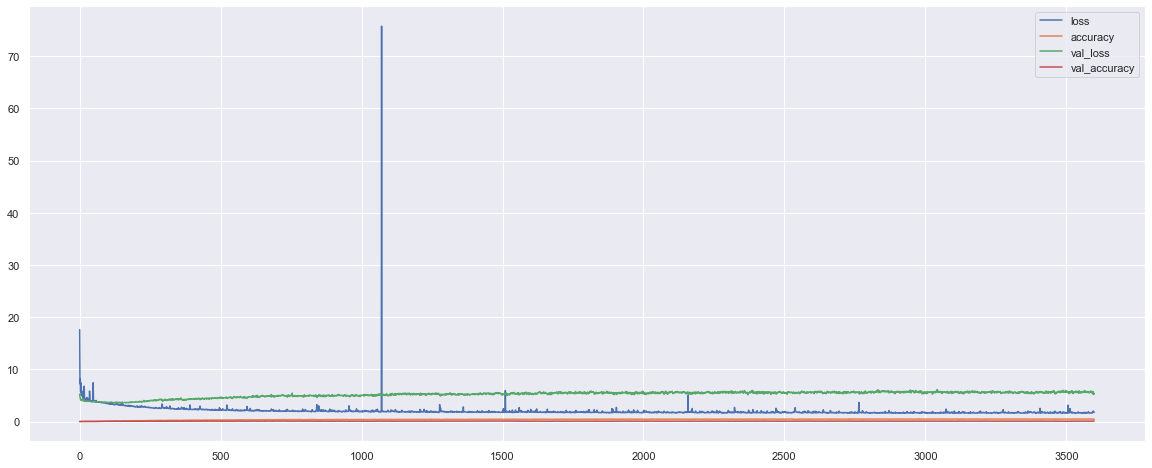

In [151]:
lostData = pd.DataFrame(model2.history.history)
lostData.plot()

Text(0.5, 1.0, 'Model Accuracy')

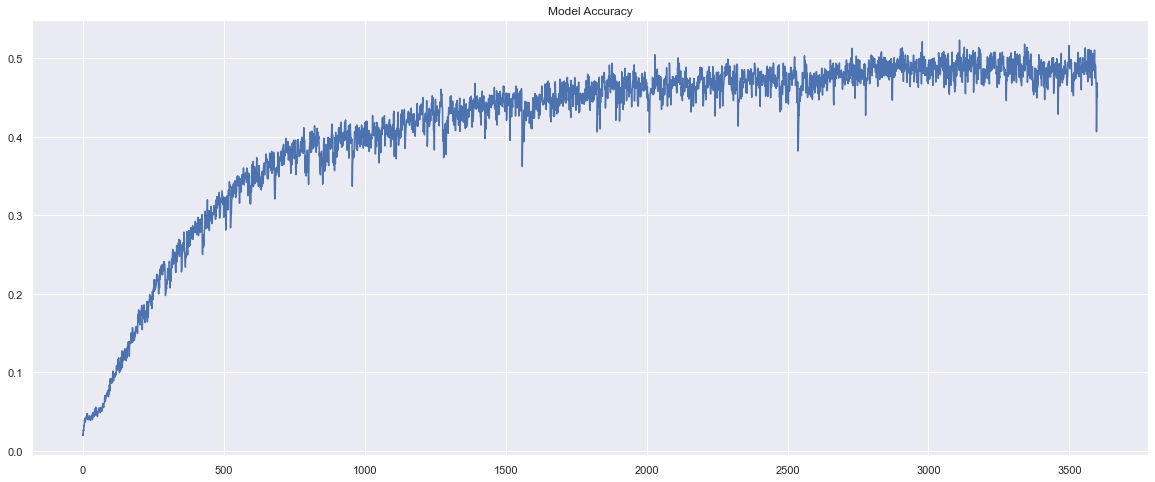

In [152]:
#Accuracy_score graph of model
plt.plot(model2.history.history['accuracy'])
plt.title('Model Accuracy')

## MODEL_V3

In [25]:
model3 = Sequential()

model3.add(Dense(30,activation="relu"))
model3.add(Dropout(0.1))
model3.add(Dense(30,activation="relu"))
model3.add(Dropout(0.1))
model3.add(Dense(30,activation="relu"))
model3.add(Dropout(0.1))
model3.add(Dense(30,activation="relu"))
model3.add(Dropout(0.1))
model3.add(Dense(30,activation="relu"))
model3.add(Dropout(0.1))
model3.add(Dense(units=50, activation='softmax'))

model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

model3.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), epochs=5200, verbose=1);

Epoch 1/5200
78/78 [==============================] - 3s 19ms/step - loss: 14.6616 - accuracy: 0.0147 - val_loss: 5.2050 - val_accuracy: 0.0156
Epoch 2/5200
78/78 [==============================] - 0s 4ms/step - loss: 23.0460 - accuracy: 0.0265 - val_loss: 4.5192 - val_accuracy: 0.0197
Epoch 3/5200
78/78 [==============================] - 0s 4ms/step - loss: 8.0252 - accuracy: 0.0187 - val_loss: 4.3907 - val_accuracy: 0.0197
Epoch 4/5200
78/78 [==============================] - 0s 3ms/step - loss: 5.9126 - accuracy: 0.0267 - val_loss: 4.1618 - val_accuracy: 0.0229
Epoch 5/5200
78/78 [==============================] - 0s 3ms/step - loss: 5.0302 - accuracy: 0.0281 - val_loss: 4.1659 - val_accuracy: 0.0270
Epoch 6/5200
78/78 [==============================] - 0s 3ms/step - loss: 7.0906 - accuracy: 0.0314 - val_loss: 4.2219 - val_accuracy: 0.0229
Epoch 7/5200
78/78 [==============================] - 0s 4ms/step - loss: 4.8085 - accuracy: 0.0328 - val_loss: 4.2361 - val_accuracy: 0.0278
Epo

78/78 [==============================] - 0s 3ms/step - loss: 3.5289 - accuracy: 0.0732 - val_loss: 3.8262 - val_accuracy: 0.0385
Epoch 116/5200
78/78 [==============================] - 0s 3ms/step - loss: 3.5222 - accuracy: 0.0714 - val_loss: 3.8219 - val_accuracy: 0.0426
Epoch 117/5200
78/78 [==============================] - 0s 4ms/step - loss: 3.4920 - accuracy: 0.0775 - val_loss: 3.8171 - val_accuracy: 0.0369
Epoch 118/5200
78/78 [==============================] - 0s 3ms/step - loss: 3.5230 - accuracy: 0.0771 - val_loss: 3.8057 - val_accuracy: 0.0410
Epoch 119/5200
78/78 [==============================] - 0s 3ms/step - loss: 3.4999 - accuracy: 0.0738 - val_loss: 3.8090 - val_accuracy: 0.0434
Epoch 120/5200
78/78 [==============================] - 0s 3ms/step - loss: 3.4814 - accuracy: 0.0763 - val_loss: 3.8302 - val_accuracy: 0.0483
Epoch 121/5200
78/78 [==============================] - 0s 2ms/step - loss: 3.4413 - accuracy: 0.0831 - val_loss: 3.8315 - val_accuracy: 0.0483
Epoch 1

Epoch 172/5200
78/78 [==============================] - 0s 5ms/step - loss: 3.2175 - accuracy: 0.1110 - val_loss: 3.9101 - val_accuracy: 0.0557
Epoch 173/5200
78/78 [==============================] - 0s 4ms/step - loss: 3.2098 - accuracy: 0.1186 - val_loss: 3.9451 - val_accuracy: 0.0639
Epoch 174/5200
78/78 [==============================] - 0s 4ms/step - loss: 3.1912 - accuracy: 0.1079 - val_loss: 3.9397 - val_accuracy: 0.0565
Epoch 175/5200
78/78 [==============================] - 0s 3ms/step - loss: 3.2107 - accuracy: 0.1260 - val_loss: 3.9412 - val_accuracy: 0.0622
Epoch 176/5200
78/78 [==============================] - 0s 3ms/step - loss: 3.2221 - accuracy: 0.1087 - val_loss: 3.9488 - val_accuracy: 0.0532
Epoch 177/5200
78/78 [==============================] - 0s 2ms/step - loss: 3.1898 - accuracy: 0.1159 - val_loss: 3.9189 - val_accuracy: 0.0541
Epoch 178/5200
78/78 [==============================] - 0s 5ms/step - loss: 3.3407 - accuracy: 0.1138 - val_loss: 3.9349 - val_accuracy:

Epoch 229/5200
78/78 [==============================] - 0s 6ms/step - loss: 2.9264 - accuracy: 0.1591 - val_loss: 4.0162 - val_accuracy: 0.0549
Epoch 230/5200
78/78 [==============================] - 0s 4ms/step - loss: 2.9562 - accuracy: 0.1297 - val_loss: 4.0981 - val_accuracy: 0.0614
Epoch 231/5200
78/78 [==============================] - 0s 4ms/step - loss: 2.9006 - accuracy: 0.1604 - val_loss: 4.1495 - val_accuracy: 0.0598
Epoch 232/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.9630 - accuracy: 0.1433 - val_loss: 4.1215 - val_accuracy: 0.0614
Epoch 233/5200
78/78 [==============================] - 0s 5ms/step - loss: 2.9296 - accuracy: 0.1612 - val_loss: 4.1255 - val_accuracy: 0.0557
Epoch 234/5200
78/78 [==============================] - 0s 4ms/step - loss: 2.8452 - accuracy: 0.1656 - val_loss: 4.1077 - val_accuracy: 0.0598
Epoch 235/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.9293 - accuracy: 0.1421 - val_loss: 4.1053 - val_accuracy:

Epoch 286/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.7430 - accuracy: 0.1692 - val_loss: 4.2413 - val_accuracy: 0.0581
Epoch 287/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.7460 - accuracy: 0.1723 - val_loss: 4.2973 - val_accuracy: 0.0631
Epoch 288/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.7504 - accuracy: 0.1812 - val_loss: 4.3317 - val_accuracy: 0.0647
Epoch 289/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.7699 - accuracy: 0.1677 - val_loss: 4.2572 - val_accuracy: 0.0647
Epoch 290/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.8400 - accuracy: 0.1840 - val_loss: 4.2897 - val_accuracy: 0.0655
Epoch 291/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.7457 - accuracy: 0.1909 - val_loss: 4.3582 - val_accuracy: 0.0688
Epoch 292/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.7444 - accuracy: 0.1756 - val_loss: 4.3183 - val_accuracy:

Epoch 343/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.5610 - accuracy: 0.2097 - val_loss: 4.5536 - val_accuracy: 0.0631
Epoch 344/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.6329 - accuracy: 0.2046 - val_loss: 4.4909 - val_accuracy: 0.0614
Epoch 345/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.6036 - accuracy: 0.2177 - val_loss: 4.4513 - val_accuracy: 0.0663
Epoch 346/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.5676 - accuracy: 0.2310 - val_loss: 4.4790 - val_accuracy: 0.0672
Epoch 347/5200
78/78 [==============================] - 0s 4ms/step - loss: 2.5754 - accuracy: 0.1992 - val_loss: 4.5354 - val_accuracy: 0.0680
Epoch 348/5200
78/78 [==============================] - 0s 4ms/step - loss: 2.6477 - accuracy: 0.2161 - val_loss: 4.4832 - val_accuracy: 0.0704
Epoch 349/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.6406 - accuracy: 0.2224 - val_loss: 4.4076 - val_accuracy:

Epoch 400/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.5533 - accuracy: 0.2400 - val_loss: 4.6117 - val_accuracy: 0.0622
Epoch 401/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.4754 - accuracy: 0.2535 - val_loss: 4.6655 - val_accuracy: 0.0713
Epoch 402/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.4923 - accuracy: 0.2419 - val_loss: 4.5949 - val_accuracy: 0.0696
Epoch 403/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.4764 - accuracy: 0.2357 - val_loss: 4.6313 - val_accuracy: 0.0614
Epoch 404/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.5636 - accuracy: 0.2438 - val_loss: 4.5394 - val_accuracy: 0.0639
Epoch 405/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.5610 - accuracy: 0.2201 - val_loss: 4.6358 - val_accuracy: 0.0680
Epoch 406/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.5180 - accuracy: 0.2371 - val_loss: 4.6536 - val_accuracy:

Epoch 457/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.3808 - accuracy: 0.2560 - val_loss: 4.8400 - val_accuracy: 0.0770
Epoch 458/5200
78/78 [==============================] - 0s 4ms/step - loss: 2.4815 - accuracy: 0.2516 - val_loss: 4.8095 - val_accuracy: 0.0704
Epoch 459/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.3612 - accuracy: 0.2655 - val_loss: 4.9554 - val_accuracy: 0.0753
Epoch 460/5200
78/78 [==============================] - 0s 4ms/step - loss: 2.3976 - accuracy: 0.2672 - val_loss: 4.8855 - val_accuracy: 0.0827
Epoch 461/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.4105 - accuracy: 0.2716 - val_loss: 4.9613 - val_accuracy: 0.0770
Epoch 462/5200
78/78 [==============================] - 0s 4ms/step - loss: 2.4178 - accuracy: 0.2552 - val_loss: 4.9522 - val_accuracy: 0.0696
Epoch 463/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.4248 - accuracy: 0.2484 - val_loss: 5.0309 - val_accuracy:

Epoch 514/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.4035 - accuracy: 0.2746 - val_loss: 4.9032 - val_accuracy: 0.0696
Epoch 515/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.3152 - accuracy: 0.2877 - val_loss: 5.0378 - val_accuracy: 0.0721
Epoch 516/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.4078 - accuracy: 0.2722 - val_loss: 5.0374 - val_accuracy: 0.0753
Epoch 517/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.3388 - accuracy: 0.2925 - val_loss: 4.9873 - val_accuracy: 0.0688
Epoch 518/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.3519 - accuracy: 0.2680 - val_loss: 4.9907 - val_accuracy: 0.0827
Epoch 519/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.3752 - accuracy: 0.2742 - val_loss: 4.9760 - val_accuracy: 0.0803
Epoch 520/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.3397 - accuracy: 0.2791 - val_loss: 5.0286 - val_accuracy:

Epoch 571/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.3997 - accuracy: 0.2733 - val_loss: 5.0493 - val_accuracy: 0.0729
Epoch 572/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.3111 - accuracy: 0.2969 - val_loss: 5.0848 - val_accuracy: 0.0713
Epoch 573/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.3465 - accuracy: 0.2961 - val_loss: 5.1707 - val_accuracy: 0.0786
Epoch 574/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.3143 - accuracy: 0.2793 - val_loss: 5.1328 - val_accuracy: 0.0778
Epoch 575/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.2919 - accuracy: 0.3037 - val_loss: 5.3482 - val_accuracy: 0.0713
Epoch 576/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.2757 - accuracy: 0.2928 - val_loss: 5.1725 - val_accuracy: 0.0794
Epoch 577/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.2778 - accuracy: 0.2997 - val_loss: 5.0172 - val_accuracy:

Epoch 628/5200
78/78 [==============================] - 0s 4ms/step - loss: 2.2237 - accuracy: 0.3134 - val_loss: 5.3790 - val_accuracy: 0.0737
Epoch 629/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.2694 - accuracy: 0.2991 - val_loss: 5.2797 - val_accuracy: 0.0721
Epoch 630/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.2214 - accuracy: 0.3125 - val_loss: 5.2534 - val_accuracy: 0.0778
Epoch 631/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.2800 - accuracy: 0.2970 - val_loss: 5.3605 - val_accuracy: 0.0721
Epoch 632/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.2970 - accuracy: 0.3091 - val_loss: 5.3659 - val_accuracy: 0.0762
Epoch 633/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.2946 - accuracy: 0.2796 - val_loss: 5.3090 - val_accuracy: 0.0704
Epoch 634/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.2716 - accuracy: 0.3064 - val_loss: 5.2105 - val_accuracy:

Epoch 685/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.1618 - accuracy: 0.3463 - val_loss: 5.5843 - val_accuracy: 0.0819
Epoch 686/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.1713 - accuracy: 0.3311 - val_loss: 5.4327 - val_accuracy: 0.0713
Epoch 687/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.1824 - accuracy: 0.3473 - val_loss: 5.3660 - val_accuracy: 0.0663
Epoch 688/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.1951 - accuracy: 0.3367 - val_loss: 5.4422 - val_accuracy: 0.0680
Epoch 689/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.1688 - accuracy: 0.3192 - val_loss: 5.4572 - val_accuracy: 0.0778
Epoch 690/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.1323 - accuracy: 0.3223 - val_loss: 5.4518 - val_accuracy: 0.0680
Epoch 691/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.1937 - accuracy: 0.3313 - val_loss: 5.3305 - val_accuracy:

Epoch 742/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.2388 - accuracy: 0.3342 - val_loss: 5.4298 - val_accuracy: 0.0729
Epoch 743/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.1685 - accuracy: 0.3198 - val_loss: 5.3665 - val_accuracy: 0.0745
Epoch 744/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.1764 - accuracy: 0.3360 - val_loss: 5.5112 - val_accuracy: 0.0655
Epoch 745/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.2053 - accuracy: 0.3503 - val_loss: 5.4743 - val_accuracy: 0.0713
Epoch 746/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.1966 - accuracy: 0.3327 - val_loss: 5.4258 - val_accuracy: 0.0745
Epoch 747/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.1792 - accuracy: 0.3394 - val_loss: 5.4123 - val_accuracy: 0.0672
Epoch 748/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.2263 - accuracy: 0.3429 - val_loss: 5.3549 - val_accuracy:

Epoch 799/5200
78/78 [==============================] - 0s 6ms/step - loss: 2.1458 - accuracy: 0.3712 - val_loss: 5.7062 - val_accuracy: 0.0737
Epoch 800/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.1654 - accuracy: 0.3498 - val_loss: 5.5922 - val_accuracy: 0.0729
Epoch 801/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.1325 - accuracy: 0.3430 - val_loss: 5.4480 - val_accuracy: 0.0753
Epoch 802/5200
78/78 [==============================] - 0s 4ms/step - loss: 2.1546 - accuracy: 0.3500 - val_loss: 5.6280 - val_accuracy: 0.0721
Epoch 803/5200
78/78 [==============================] - 0s 4ms/step - loss: 2.1381 - accuracy: 0.3435 - val_loss: 5.5747 - val_accuracy: 0.0672
Epoch 804/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.0987 - accuracy: 0.3554 - val_loss: 5.6621 - val_accuracy: 0.0729
Epoch 805/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.1094 - accuracy: 0.3365 - val_loss: 5.6490 - val_accuracy:

Epoch 856/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.1531 - accuracy: 0.3531 - val_loss: 5.6141 - val_accuracy: 0.0672
Epoch 857/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.1378 - accuracy: 0.3470 - val_loss: 5.6743 - val_accuracy: 0.0696
Epoch 858/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.1166 - accuracy: 0.3457 - val_loss: 5.7769 - val_accuracy: 0.0745
Epoch 859/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.1447 - accuracy: 0.3717 - val_loss: 5.6509 - val_accuracy: 0.0704
Epoch 860/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.2001 - accuracy: 0.3423 - val_loss: 5.5763 - val_accuracy: 0.0721
Epoch 861/5200
78/78 [==============================] - 0s 4ms/step - loss: 2.1752 - accuracy: 0.3494 - val_loss: 5.7684 - val_accuracy: 0.0819
Epoch 862/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.0679 - accuracy: 0.3644 - val_loss: 5.6760 - val_accuracy:

Epoch 969/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.0839 - accuracy: 0.3718 - val_loss: 5.6642 - val_accuracy: 0.0770
Epoch 970/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.0618 - accuracy: 0.3633 - val_loss: 5.6968 - val_accuracy: 0.0737
Epoch 971/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.0349 - accuracy: 0.3821 - val_loss: 5.6065 - val_accuracy: 0.0704
Epoch 972/5200
78/78 [==============================] - ETA: 0s - loss: 2.0434 - accuracy: 0.36 - 0s 3ms/step - loss: 2.0528 - accuracy: 0.3656 - val_loss: 5.7796 - val_accuracy: 0.0753
Epoch 973/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.0612 - accuracy: 0.3827 - val_loss: 5.8642 - val_accuracy: 0.0721
Epoch 974/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.0720 - accuracy: 0.3762 - val_loss: 5.7752 - val_accuracy: 0.0729
Epoch 975/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.1502 - accuracy:

78/78 [==============================] - 0s 2ms/step - loss: 2.0868 - accuracy: 0.3772 - val_loss: 5.8105 - val_accuracy: 0.0803
Epoch 1082/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.0361 - accuracy: 0.3863 - val_loss: 5.7072 - val_accuracy: 0.0762
Epoch 1083/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.0462 - accuracy: 0.3928 - val_loss: 5.8306 - val_accuracy: 0.0762
Epoch 1084/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.0691 - accuracy: 0.3848 - val_loss: 5.7223 - val_accuracy: 0.0778
Epoch 1085/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.0226 - accuracy: 0.3912 - val_loss: 5.7326 - val_accuracy: 0.0729
Epoch 1086/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9494 - accuracy: 0.4046 - val_loss: 5.8554 - val_accuracy: 0.0753
Epoch 1087/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.0519 - accuracy: 0.4024 - val_loss: 6.0228 - val_accuracy: 0.0778
E

78/78 [==============================] - 0s 2ms/step - loss: 2.0524 - accuracy: 0.3787 - val_loss: 5.9282 - val_accuracy: 0.0655
Epoch 1194/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.0866 - accuracy: 0.3884 - val_loss: 5.7685 - val_accuracy: 0.0778
Epoch 1195/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9890 - accuracy: 0.4161 - val_loss: 5.5996 - val_accuracy: 0.0794
Epoch 1196/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.0581 - accuracy: 0.3989 - val_loss: 5.7983 - val_accuracy: 0.0639
Epoch 1197/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.1245 - accuracy: 0.3645 - val_loss: 5.7836 - val_accuracy: 0.0696
Epoch 1198/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.0401 - accuracy: 0.3724 - val_loss: 5.8164 - val_accuracy: 0.0729
Epoch 1199/5200
78/78 [==============================] - 0s 3ms/step - loss: 2.0483 - accuracy: 0.3839 - val_loss: 5.8429 - val_accuracy: 0.0762
E

78/78 [==============================] - 0s 2ms/step - loss: 1.9453 - accuracy: 0.4155 - val_loss: 5.9591 - val_accuracy: 0.0729
Epoch 1306/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9989 - accuracy: 0.4009 - val_loss: 5.9585 - val_accuracy: 0.0696
Epoch 1307/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.0294 - accuracy: 0.3939 - val_loss: 5.7362 - val_accuracy: 0.0721
Epoch 1308/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9956 - accuracy: 0.3925 - val_loss: 5.7374 - val_accuracy: 0.0811
Epoch 1309/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.0038 - accuracy: 0.4164 - val_loss: 6.0216 - val_accuracy: 0.0655
Epoch 1310/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.2119 - accuracy: 0.3879 - val_loss: 5.6814 - val_accuracy: 0.0704
Epoch 1311/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.0278 - accuracy: 0.3965 - val_loss: 5.8852 - val_accuracy: 0.0721
E

78/78 [==============================] - 0s 3ms/step - loss: 2.0193 - accuracy: 0.3930 - val_loss: 5.9982 - val_accuracy: 0.0827
Epoch 1418/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.9667 - accuracy: 0.3902 - val_loss: 5.8762 - val_accuracy: 0.0737
Epoch 1419/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9169 - accuracy: 0.4217 - val_loss: 5.7559 - val_accuracy: 0.0737
Epoch 1420/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9183 - accuracy: 0.4201 - val_loss: 5.9138 - val_accuracy: 0.0803
Epoch 1421/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.9726 - accuracy: 0.4093 - val_loss: 6.0805 - val_accuracy: 0.0729
Epoch 1422/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9932 - accuracy: 0.4066 - val_loss: 6.0449 - val_accuracy: 0.0876
Epoch 1423/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9595 - accuracy: 0.4289 - val_loss: 5.8783 - val_accuracy: 0.0794
E

78/78 [==============================] - 0s 2ms/step - loss: 1.9412 - accuracy: 0.4171 - val_loss: 6.3481 - val_accuracy: 0.0852
Epoch 1530/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9138 - accuracy: 0.4247 - val_loss: 6.2347 - val_accuracy: 0.0713
Epoch 1531/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8838 - accuracy: 0.4289 - val_loss: 6.1775 - val_accuracy: 0.0713
Epoch 1532/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8965 - accuracy: 0.4270 - val_loss: 6.0801 - val_accuracy: 0.0811
Epoch 1533/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.0275 - accuracy: 0.4086 - val_loss: 5.9417 - val_accuracy: 0.0794
Epoch 1534/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9479 - accuracy: 0.3932 - val_loss: 6.0995 - val_accuracy: 0.0819
Epoch 1535/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9092 - accuracy: 0.4312 - val_loss: 5.8769 - val_accuracy: 0.0663
E

78/78 [==============================] - 0s 2ms/step - loss: 1.9203 - accuracy: 0.4257 - val_loss: 6.1577 - val_accuracy: 0.0729
Epoch 1642/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.9921 - accuracy: 0.4176 - val_loss: 6.3319 - val_accuracy: 0.0745
Epoch 1643/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.9506 - accuracy: 0.4140 - val_loss: 6.3692 - val_accuracy: 0.0704
Epoch 1644/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9363 - accuracy: 0.4396 - val_loss: 6.0926 - val_accuracy: 0.0753
Epoch 1645/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9836 - accuracy: 0.4109 - val_loss: 6.2176 - val_accuracy: 0.0713
Epoch 1646/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.9850 - accuracy: 0.4140 - val_loss: 6.3574 - val_accuracy: 0.0729
Epoch 1647/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9368 - accuracy: 0.4296 - val_loss: 6.1956 - val_accuracy: 0.0745
E

78/78 [==============================] - 0s 3ms/step - loss: 1.9304 - accuracy: 0.4218 - val_loss: 6.3155 - val_accuracy: 0.0778
Epoch 1754/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.8790 - accuracy: 0.4398 - val_loss: 6.3137 - val_accuracy: 0.0737
Epoch 1755/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.9930 - accuracy: 0.4185 - val_loss: 6.3212 - val_accuracy: 0.0844
Epoch 1756/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.9014 - accuracy: 0.4128 - val_loss: 6.2562 - val_accuracy: 0.0770
Epoch 1757/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.9060 - accuracy: 0.4306 - val_loss: 6.1558 - val_accuracy: 0.0885
Epoch 1758/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.8849 - accuracy: 0.4438 - val_loss: 6.3365 - val_accuracy: 0.0934
Epoch 1759/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.8720 - accuracy: 0.4427 - val_loss: 6.1135 - val_accuracy: 0.0737
E

78/78 [==============================] - 0s 3ms/step - loss: 2.0003 - accuracy: 0.4017 - val_loss: 6.1782 - val_accuracy: 0.0770
Epoch 1866/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9918 - accuracy: 0.4005 - val_loss: 6.1378 - val_accuracy: 0.0770
Epoch 1867/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9604 - accuracy: 0.4088 - val_loss: 6.1810 - val_accuracy: 0.0827
Epoch 1868/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9085 - accuracy: 0.4445 - val_loss: 6.1667 - val_accuracy: 0.0721
Epoch 1869/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.9591 - accuracy: 0.4094 - val_loss: 6.0095 - val_accuracy: 0.0786
Epoch 1870/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.9387 - accuracy: 0.4238 - val_loss: 6.4545 - val_accuracy: 0.0835
Epoch 1871/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.9301 - accuracy: 0.4234 - val_loss: 6.1522 - val_accuracy: 0.0835
E

78/78 [==============================] - 0s 3ms/step - loss: 1.9390 - accuracy: 0.4174 - val_loss: 6.0654 - val_accuracy: 0.0704
Epoch 1978/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.8233 - accuracy: 0.4581 - val_loss: 6.3447 - val_accuracy: 0.0688
Epoch 1979/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.9128 - accuracy: 0.4314 - val_loss: 6.3154 - val_accuracy: 0.0844
Epoch 1980/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.9329 - accuracy: 0.4340 - val_loss: 6.2754 - val_accuracy: 0.0827
Epoch 1981/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.9437 - accuracy: 0.4058 - val_loss: 6.4182 - val_accuracy: 0.0811
Epoch 1982/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.9017 - accuracy: 0.4266 - val_loss: 6.2679 - val_accuracy: 0.0794
Epoch 1983/5200
78/78 [==============================] - 0s 6ms/step - loss: 1.9261 - accuracy: 0.4201 - val_loss: 6.2677 - val_accuracy: 0.0860
E

78/78 [==============================] - 0s 4ms/step - loss: 1.8874 - accuracy: 0.4476 - val_loss: 6.4262 - val_accuracy: 0.0794
Epoch 2090/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.8633 - accuracy: 0.4473 - val_loss: 6.2208 - val_accuracy: 0.0835
Epoch 2091/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.9243 - accuracy: 0.4318 - val_loss: 6.2153 - val_accuracy: 0.0696
Epoch 2092/5200
78/78 [==============================] - 0s 4ms/step - loss: 2.1416 - accuracy: 0.4397 - val_loss: 6.2911 - val_accuracy: 0.0721
Epoch 2093/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.9298 - accuracy: 0.4356 - val_loss: 6.3355 - val_accuracy: 0.0753
Epoch 2094/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.8995 - accuracy: 0.4345 - val_loss: 6.4141 - val_accuracy: 0.0794
Epoch 2095/5200
78/78 [==============================] - 0s 4ms/step - loss: 2.0355 - accuracy: 0.4343 - val_loss: 6.0574 - val_accuracy: 0.0803
E

78/78 [==============================] - 0s 3ms/step - loss: 1.9010 - accuracy: 0.4260 - val_loss: 6.2750 - val_accuracy: 0.0811
Epoch 2202/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.9962 - accuracy: 0.4233 - val_loss: 6.4541 - val_accuracy: 0.0811
Epoch 2203/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.8176 - accuracy: 0.4650 - val_loss: 6.2546 - val_accuracy: 0.0721
Epoch 2204/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.9156 - accuracy: 0.4320 - val_loss: 6.4309 - val_accuracy: 0.0803
Epoch 2205/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.8791 - accuracy: 0.4459 - val_loss: 6.3184 - val_accuracy: 0.0794
Epoch 2206/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.8999 - accuracy: 0.4377 - val_loss: 6.5457 - val_accuracy: 0.0713
Epoch 2207/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.8626 - accuracy: 0.4480 - val_loss: 6.2537 - val_accuracy: 0.0688
E

78/78 [==============================] - 0s 2ms/step - loss: 1.9255 - accuracy: 0.4391 - val_loss: 6.4746 - val_accuracy: 0.0713
Epoch 2314/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8707 - accuracy: 0.4426 - val_loss: 6.2957 - val_accuracy: 0.0737
Epoch 2315/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8837 - accuracy: 0.4524 - val_loss: 6.2505 - val_accuracy: 0.0631
Epoch 2316/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8826 - accuracy: 0.4409 - val_loss: 6.6202 - val_accuracy: 0.0827
Epoch 2317/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9138 - accuracy: 0.4252 - val_loss: 6.3484 - val_accuracy: 0.0794
Epoch 2318/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8323 - accuracy: 0.4636 - val_loss: 6.3160 - val_accuracy: 0.0786
Epoch 2319/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8960 - accuracy: 0.4350 - val_loss: 6.3936 - val_accuracy: 0.0811
E

78/78 [==============================] - 0s 2ms/step - loss: 1.8576 - accuracy: 0.4610 - val_loss: 6.2666 - val_accuracy: 0.0745
Epoch 2426/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8461 - accuracy: 0.4518 - val_loss: 6.4243 - val_accuracy: 0.0729
Epoch 2427/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8811 - accuracy: 0.4444 - val_loss: 6.3471 - val_accuracy: 0.0663
Epoch 2428/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8282 - accuracy: 0.4809 - val_loss: 6.5213 - val_accuracy: 0.0868
Epoch 2429/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8553 - accuracy: 0.4606 - val_loss: 6.4617 - val_accuracy: 0.0819
Epoch 2430/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8371 - accuracy: 0.4565 - val_loss: 6.3386 - val_accuracy: 0.0696
Epoch 2431/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8229 - accuracy: 0.4585 - val_loss: 6.3157 - val_accuracy: 0.0598
E

78/78 [==============================] - 0s 2ms/step - loss: 1.8951 - accuracy: 0.4289 - val_loss: 6.5711 - val_accuracy: 0.0745
Epoch 2538/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8576 - accuracy: 0.4465 - val_loss: 6.2765 - val_accuracy: 0.0713
Epoch 2539/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7936 - accuracy: 0.4815 - val_loss: 6.3895 - val_accuracy: 0.0688
Epoch 2540/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8498 - accuracy: 0.4518 - val_loss: 6.4686 - val_accuracy: 0.0778
Epoch 2541/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8426 - accuracy: 0.4580 - val_loss: 6.3610 - val_accuracy: 0.0606
Epoch 2542/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7864 - accuracy: 0.4597 - val_loss: 6.4653 - val_accuracy: 0.0688
Epoch 2543/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7956 - accuracy: 0.4573 - val_loss: 6.3777 - val_accuracy: 0.0704
E

78/78 [==============================] - 0s 3ms/step - loss: 1.8393 - accuracy: 0.4660 - val_loss: 6.4599 - val_accuracy: 0.0737
Epoch 2650/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.8005 - accuracy: 0.4674 - val_loss: 6.3333 - val_accuracy: 0.0672
Epoch 2651/5200
78/78 [==============================] - 0s 2ms/step - loss: 2.0546 - accuracy: 0.4280 - val_loss: 6.2795 - val_accuracy: 0.0663
Epoch 2652/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8515 - accuracy: 0.4623 - val_loss: 6.4807 - val_accuracy: 0.0565
Epoch 2653/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9223 - accuracy: 0.4605 - val_loss: 6.5220 - val_accuracy: 0.0794
Epoch 2654/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9170 - accuracy: 0.4239 - val_loss: 6.3862 - val_accuracy: 0.0778
Epoch 2655/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8031 - accuracy: 0.4530 - val_loss: 6.3239 - val_accuracy: 0.0762
E

78/78 [==============================] - 0s 2ms/step - loss: 1.7791 - accuracy: 0.4741 - val_loss: 6.4851 - val_accuracy: 0.0737
Epoch 2762/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8687 - accuracy: 0.4547 - val_loss: 6.3490 - val_accuracy: 0.0696
Epoch 2763/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8803 - accuracy: 0.4491 - val_loss: 7.6254 - val_accuracy: 0.0876
Epoch 2764/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9530 - accuracy: 0.4244 - val_loss: 6.5709 - val_accuracy: 0.0844
Epoch 2765/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7961 - accuracy: 0.4460 - val_loss: 6.6595 - val_accuracy: 0.0835
Epoch 2766/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8656 - accuracy: 0.4455 - val_loss: 6.6166 - val_accuracy: 0.0852
Epoch 2767/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8245 - accuracy: 0.4744 - val_loss: 6.3921 - val_accuracy: 0.0745
E

78/78 [==============================] - 0s 2ms/step - loss: 1.7969 - accuracy: 0.4743 - val_loss: 6.5043 - val_accuracy: 0.0688
Epoch 2874/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8381 - accuracy: 0.4698 - val_loss: 6.3077 - val_accuracy: 0.0688
Epoch 2875/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7795 - accuracy: 0.4723 - val_loss: 6.4205 - val_accuracy: 0.0655
Epoch 2876/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8220 - accuracy: 0.4568 - val_loss: 6.2943 - val_accuracy: 0.0647
Epoch 2877/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7861 - accuracy: 0.4716 - val_loss: 6.4132 - val_accuracy: 0.0655
Epoch 2878/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7878 - accuracy: 0.4726 - val_loss: 6.3802 - val_accuracy: 0.0721
Epoch 2879/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7897 - accuracy: 0.4813 - val_loss: 6.3514 - val_accuracy: 0.0778
E

78/78 [==============================] - 0s 2ms/step - loss: 1.8330 - accuracy: 0.4557 - val_loss: 6.6375 - val_accuracy: 0.0713
Epoch 2986/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8445 - accuracy: 0.4571 - val_loss: 6.7986 - val_accuracy: 0.0745
Epoch 2987/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7515 - accuracy: 0.4637 - val_loss: 6.7611 - val_accuracy: 0.0655
Epoch 2988/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8627 - accuracy: 0.4538 - val_loss: 6.7710 - val_accuracy: 0.0704
Epoch 2989/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.9067 - accuracy: 0.4307 - val_loss: 6.4184 - val_accuracy: 0.0786
Epoch 2990/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8697 - accuracy: 0.4538 - val_loss: 6.7306 - val_accuracy: 0.0770
Epoch 2991/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8681 - accuracy: 0.4674 - val_loss: 6.6563 - val_accuracy: 0.0745
E

78/78 [==============================] - 0s 2ms/step - loss: 1.7294 - accuracy: 0.4875 - val_loss: 6.7788 - val_accuracy: 0.0745
Epoch 3098/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7831 - accuracy: 0.4762 - val_loss: 6.5608 - val_accuracy: 0.0672
Epoch 3099/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8537 - accuracy: 0.4669 - val_loss: 6.3868 - val_accuracy: 0.0753
Epoch 3100/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8089 - accuracy: 0.4704 - val_loss: 6.5045 - val_accuracy: 0.0713
Epoch 3101/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7681 - accuracy: 0.4823 - val_loss: 6.4287 - val_accuracy: 0.0721
Epoch 3102/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8241 - accuracy: 0.4641 - val_loss: 6.5200 - val_accuracy: 0.0704
Epoch 3103/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7995 - accuracy: 0.4592 - val_loss: 6.6728 - val_accuracy: 0.0753
E

78/78 [==============================] - 0s 2ms/step - loss: 1.7581 - accuracy: 0.4917 - val_loss: 6.4777 - val_accuracy: 0.0762
Epoch 3210/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7478 - accuracy: 0.4749 - val_loss: 6.5731 - val_accuracy: 0.0663
Epoch 3211/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8216 - accuracy: 0.4756 - val_loss: 6.5768 - val_accuracy: 0.0704
Epoch 3212/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8491 - accuracy: 0.4522 - val_loss: 6.4885 - val_accuracy: 0.0819
Epoch 3213/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8238 - accuracy: 0.4694 - val_loss: 6.3499 - val_accuracy: 0.0713
Epoch 3214/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8213 - accuracy: 0.4740 - val_loss: 6.5271 - val_accuracy: 0.0770
Epoch 3215/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7945 - accuracy: 0.4821 - val_loss: 6.6487 - val_accuracy: 0.0745
E

78/78 [==============================] - 0s 2ms/step - loss: 1.8362 - accuracy: 0.4671 - val_loss: 6.2598 - val_accuracy: 0.0688
Epoch 3322/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8923 - accuracy: 0.4655 - val_loss: 6.3206 - val_accuracy: 0.0819
Epoch 3323/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7740 - accuracy: 0.4817 - val_loss: 6.3306 - val_accuracy: 0.0753
Epoch 3324/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7599 - accuracy: 0.4824 - val_loss: 6.3789 - val_accuracy: 0.0762
Epoch 3325/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8690 - accuracy: 0.4552 - val_loss: 6.8170 - val_accuracy: 0.0753
Epoch 3326/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7349 - accuracy: 0.4888 - val_loss: 6.5615 - val_accuracy: 0.0663
Epoch 3327/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7130 - accuracy: 0.4805 - val_loss: 6.4817 - val_accuracy: 0.0762
E

78/78 [==============================] - 0s 2ms/step - loss: 1.8207 - accuracy: 0.4548 - val_loss: 6.4456 - val_accuracy: 0.0704
Epoch 3434/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8543 - accuracy: 0.4632 - val_loss: 6.5861 - val_accuracy: 0.0737
Epoch 3435/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8704 - accuracy: 0.4624 - val_loss: 6.9394 - val_accuracy: 0.0680
Epoch 3436/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7875 - accuracy: 0.4780 - val_loss: 6.7301 - val_accuracy: 0.0713
Epoch 3437/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7421 - accuracy: 0.4851 - val_loss: 6.7834 - val_accuracy: 0.0745
Epoch 3438/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7346 - accuracy: 0.4803 - val_loss: 6.6529 - val_accuracy: 0.0655
Epoch 3439/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7853 - accuracy: 0.4879 - val_loss: 6.7269 - val_accuracy: 0.0737
E

78/78 [==============================] - 0s 2ms/step - loss: 1.7077 - accuracy: 0.5033 - val_loss: 6.8638 - val_accuracy: 0.0655
Epoch 3546/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7751 - accuracy: 0.4972 - val_loss: 6.7801 - val_accuracy: 0.0663
Epoch 3547/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7255 - accuracy: 0.4941 - val_loss: 6.6776 - val_accuracy: 0.0713
Epoch 3548/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7982 - accuracy: 0.4814 - val_loss: 6.6412 - val_accuracy: 0.0729
Epoch 3549/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.8171 - accuracy: 0.4853 - val_loss: 6.6333 - val_accuracy: 0.0663
Epoch 3550/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7296 - accuracy: 0.5059 - val_loss: 6.7387 - val_accuracy: 0.0745
Epoch 3551/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7848 - accuracy: 0.5069 - val_loss: 6.3808 - val_accuracy: 0.0688
E

78/78 [==============================] - 0s 2ms/step - loss: 1.7604 - accuracy: 0.4827 - val_loss: 6.6550 - val_accuracy: 0.0663
Epoch 3658/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7437 - accuracy: 0.4999 - val_loss: 6.6124 - val_accuracy: 0.0680
Epoch 3659/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.6814 - accuracy: 0.4906 - val_loss: 6.9641 - val_accuracy: 0.0819
Epoch 3660/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7971 - accuracy: 0.4910 - val_loss: 6.5960 - val_accuracy: 0.0704
Epoch 3661/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7207 - accuracy: 0.4872 - val_loss: 6.5316 - val_accuracy: 0.0672
Epoch 3662/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7503 - accuracy: 0.4948 - val_loss: 6.5277 - val_accuracy: 0.0672
Epoch 3663/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7967 - accuracy: 0.4793 - val_loss: 6.6494 - val_accuracy: 0.0721
E

78/78 [==============================] - 0s 2ms/step - loss: 1.7425 - accuracy: 0.4678 - val_loss: 6.8142 - val_accuracy: 0.0680
Epoch 3770/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7710 - accuracy: 0.4760 - val_loss: 6.8581 - val_accuracy: 0.0729
Epoch 3771/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7669 - accuracy: 0.4939 - val_loss: 7.0899 - val_accuracy: 0.0647
Epoch 3772/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.6779 - accuracy: 0.5068 - val_loss: 6.8878 - val_accuracy: 0.0639
Epoch 3773/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7879 - accuracy: 0.4707 - val_loss: 6.7653 - val_accuracy: 0.0655
Epoch 3774/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7625 - accuracy: 0.4848 - val_loss: 6.9244 - val_accuracy: 0.0614
Epoch 3775/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7115 - accuracy: 0.4971 - val_loss: 6.6506 - val_accuracy: 0.0622
E

78/78 [==============================] - 0s 2ms/step - loss: 1.7626 - accuracy: 0.4760 - val_loss: 6.8052 - val_accuracy: 0.0672
Epoch 3882/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7421 - accuracy: 0.4940 - val_loss: 6.7743 - val_accuracy: 0.0672
Epoch 3883/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.6737 - accuracy: 0.4994 - val_loss: 6.9182 - val_accuracy: 0.0713
Epoch 3884/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7113 - accuracy: 0.5032 - val_loss: 6.9180 - val_accuracy: 0.0672
Epoch 3885/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7618 - accuracy: 0.4993 - val_loss: 6.9153 - val_accuracy: 0.0704
Epoch 3886/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7922 - accuracy: 0.4704 - val_loss: 6.6914 - val_accuracy: 0.0696
Epoch 3887/5200
78/78 [==============================] - 0s 2ms/step - loss: 1.7254 - accuracy: 0.5022 - val_loss: 6.8648 - val_accuracy: 0.0737
E

78/78 [==============================] - 0s 4ms/step - loss: 1.7998 - accuracy: 0.4797 - val_loss: 6.4589 - val_accuracy: 0.0688
Epoch 3994/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.6909 - accuracy: 0.5019 - val_loss: 7.2978 - val_accuracy: 0.0753
Epoch 3995/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.7248 - accuracy: 0.4941 - val_loss: 6.9969 - val_accuracy: 0.0704
Epoch 3996/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.7641 - accuracy: 0.4835 - val_loss: 6.9041 - val_accuracy: 0.0672
Epoch 3997/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.7189 - accuracy: 0.5036 - val_loss: 6.3942 - val_accuracy: 0.0663
Epoch 3998/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.7176 - accuracy: 0.5043 - val_loss: 6.7526 - val_accuracy: 0.0688
Epoch 3999/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.6866 - accuracy: 0.4883 - val_loss: 6.7630 - val_accuracy: 0.0696
E

78/78 [==============================] - 0s 4ms/step - loss: 1.7653 - accuracy: 0.4765 - val_loss: 7.0275 - val_accuracy: 0.0704
Epoch 4106/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.7545 - accuracy: 0.4893 - val_loss: 6.7602 - val_accuracy: 0.0696
Epoch 4107/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.7684 - accuracy: 0.4978 - val_loss: 6.9136 - val_accuracy: 0.0672
Epoch 4108/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.7161 - accuracy: 0.5103 - val_loss: 6.7928 - val_accuracy: 0.0639
Epoch 4109/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.7570 - accuracy: 0.4850 - val_loss: 6.9882 - val_accuracy: 0.0680
Epoch 4110/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.7705 - accuracy: 0.4695 - val_loss: 6.6000 - val_accuracy: 0.0672
Epoch 4111/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.8537 - accuracy: 0.4690 - val_loss: 6.9186 - val_accuracy: 0.0737
E

78/78 [==============================] - 0s 4ms/step - loss: 1.7484 - accuracy: 0.4939 - val_loss: 6.1754 - val_accuracy: 0.0704
Epoch 4218/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.6938 - accuracy: 0.5083 - val_loss: 6.5456 - val_accuracy: 0.0688
Epoch 4219/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.8142 - accuracy: 0.4723 - val_loss: 7.1572 - val_accuracy: 0.0803
Epoch 4220/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.8098 - accuracy: 0.4628 - val_loss: 6.6475 - val_accuracy: 0.0737
Epoch 4221/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.8343 - accuracy: 0.4745 - val_loss: 6.8720 - val_accuracy: 0.0794
Epoch 4222/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.7134 - accuracy: 0.5051 - val_loss: 6.6262 - val_accuracy: 0.0721
Epoch 4223/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.8209 - accuracy: 0.4539 - val_loss: 6.9129 - val_accuracy: 0.0753
E

78/78 [==============================] - 0s 5ms/step - loss: 1.7467 - accuracy: 0.4960 - val_loss: 6.9268 - val_accuracy: 0.0680
Epoch 4330/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.7385 - accuracy: 0.4864 - val_loss: 6.7779 - val_accuracy: 0.0721
Epoch 4331/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.8051 - accuracy: 0.4808 - val_loss: 6.7866 - val_accuracy: 0.0696
Epoch 4332/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.8450 - accuracy: 0.4872 - val_loss: 6.4662 - val_accuracy: 0.0713
Epoch 4333/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.7630 - accuracy: 0.4736 - val_loss: 6.7870 - val_accuracy: 0.0647
Epoch 4334/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.8052 - accuracy: 0.4873 - val_loss: 6.6919 - val_accuracy: 0.0647
Epoch 4335/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.7787 - accuracy: 0.4849 - val_loss: 6.5899 - val_accuracy: 0.0753
E

78/78 [==============================] - ETA: 0s - loss: 1.8644 - accuracy: 0.48 - 0s 4ms/step - loss: 1.8918 - accuracy: 0.4761 - val_loss: 6.5701 - val_accuracy: 0.0704
Epoch 4442/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.8604 - accuracy: 0.4465 - val_loss: 6.3972 - val_accuracy: 0.0770
Epoch 4443/5200
78/78 [==============================] - 0s 5ms/step - loss: 1.7615 - accuracy: 0.4788 - val_loss: 6.3307 - val_accuracy: 0.0713
Epoch 4444/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.7635 - accuracy: 0.4775 - val_loss: 6.5685 - val_accuracy: 0.0745
Epoch 4445/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.7688 - accuracy: 0.4999 - val_loss: 6.5708 - val_accuracy: 0.0794
Epoch 4446/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.8408 - accuracy: 0.4457 - val_loss: 6.8207 - val_accuracy: 0.0852
Epoch 4447/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.8144 - accuracy: 0.4639 -

78/78 [==============================] - 0s 3ms/step - loss: 1.7214 - accuracy: 0.4926 - val_loss: 6.9031 - val_accuracy: 0.0622
Epoch 4554/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.6504 - accuracy: 0.5161 - val_loss: 7.1071 - val_accuracy: 0.0713
Epoch 4555/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.7272 - accuracy: 0.5175 - val_loss: 7.0481 - val_accuracy: 0.0639
Epoch 4556/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.6965 - accuracy: 0.5069 - val_loss: 6.9145 - val_accuracy: 0.0713
Epoch 4557/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.7225 - accuracy: 0.4923 - val_loss: 7.0834 - val_accuracy: 0.0688
Epoch 4558/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.8343 - accuracy: 0.4999 - val_loss: 6.7044 - val_accuracy: 0.0631
Epoch 4559/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.7146 - accuracy: 0.5107 - val_loss: 7.1896 - val_accuracy: 0.0622
E

78/78 [==============================] - 0s 5ms/step - loss: 1.7215 - accuracy: 0.4986 - val_loss: 7.1865 - val_accuracy: 0.0827
Epoch 4666/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.7767 - accuracy: 0.4929 - val_loss: 6.9440 - val_accuracy: 0.0778
Epoch 4667/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.6830 - accuracy: 0.4962 - val_loss: 6.9532 - val_accuracy: 0.0713
Epoch 4668/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.7046 - accuracy: 0.4992 - val_loss: 7.6379 - val_accuracy: 0.0762
Epoch 4669/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.6952 - accuracy: 0.4998 - val_loss: 7.0146 - val_accuracy: 0.0729
Epoch 4670/5200
78/78 [==============================] - 0s 5ms/step - loss: 1.6817 - accuracy: 0.5020 - val_loss: 7.1311 - val_accuracy: 0.0631
Epoch 4671/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.7528 - accuracy: 0.5151 - val_loss: 7.2423 - val_accuracy: 0.0745
E

78/78 [==============================] - 0s 5ms/step - loss: 1.7094 - accuracy: 0.5193 - val_loss: 7.4700 - val_accuracy: 0.0803
Epoch 4778/5200
78/78 [==============================] - 0s 5ms/step - loss: 1.6915 - accuracy: 0.5099 - val_loss: 7.3486 - val_accuracy: 0.0737
Epoch 4779/5200
78/78 [==============================] - 0s 5ms/step - loss: 1.7400 - accuracy: 0.5029 - val_loss: 7.4399 - val_accuracy: 0.0762
Epoch 4780/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.6768 - accuracy: 0.4983 - val_loss: 7.2910 - val_accuracy: 0.0713
Epoch 4781/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.7066 - accuracy: 0.4917 - val_loss: 7.2970 - val_accuracy: 0.0622
Epoch 4782/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.7305 - accuracy: 0.4831 - val_loss: 7.1762 - val_accuracy: 0.0745
Epoch 4783/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.6479 - accuracy: 0.5250 - val_loss: 7.3190 - val_accuracy: 0.0794
E

78/78 [==============================] - 0s 3ms/step - loss: 1.7418 - accuracy: 0.4800 - val_loss: 7.3136 - val_accuracy: 0.0704
Epoch 4890/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.7234 - accuracy: 0.5075 - val_loss: 7.0686 - val_accuracy: 0.0721
Epoch 4891/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.7267 - accuracy: 0.5026 - val_loss: 7.2670 - val_accuracy: 0.0721
Epoch 4892/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.7012 - accuracy: 0.4885 - val_loss: 7.5597 - val_accuracy: 0.0753
Epoch 4893/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.7572 - accuracy: 0.5013 - val_loss: 7.5308 - val_accuracy: 0.0803
Epoch 4894/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.8265 - accuracy: 0.4905 - val_loss: 7.4265 - val_accuracy: 0.0713
Epoch 4895/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.7126 - accuracy: 0.4988 - val_loss: 7.2865 - val_accuracy: 0.0778
E

78/78 [==============================] - 0s 4ms/step - loss: 1.6965 - accuracy: 0.5177 - val_loss: 7.6987 - val_accuracy: 0.0844
Epoch 5002/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.6754 - accuracy: 0.5036 - val_loss: 7.1716 - val_accuracy: 0.0729
Epoch 5003/5200
78/78 [==============================] - 0s 5ms/step - loss: 1.7298 - accuracy: 0.4976 - val_loss: 7.5559 - val_accuracy: 0.0753
Epoch 5004/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.6543 - accuracy: 0.5310 - val_loss: 7.4306 - val_accuracy: 0.0704
Epoch 5005/5200
78/78 [==============================] - 0s 5ms/step - loss: 1.6715 - accuracy: 0.5118 - val_loss: 7.4769 - val_accuracy: 0.0778
Epoch 5006/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.7680 - accuracy: 0.4769 - val_loss: 7.3488 - val_accuracy: 0.0737
Epoch 5007/5200
78/78 [==============================] - 0s 4ms/step - loss: 1.6973 - accuracy: 0.5226 - val_loss: 7.1750 - val_accuracy: 0.0688
E

78/78 [==============================] - 0s 4ms/step - loss: 1.6695 - accuracy: 0.5158 - val_loss: 7.2999 - val_accuracy: 0.0770
Epoch 5114/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.6617 - accuracy: 0.5324 - val_loss: 7.2008 - val_accuracy: 0.0803
Epoch 5115/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.7247 - accuracy: 0.4989 - val_loss: 7.1797 - val_accuracy: 0.0753
Epoch 5116/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.7540 - accuracy: 0.4815 - val_loss: 7.1338 - val_accuracy: 0.0770
Epoch 5117/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.7260 - accuracy: 0.5108 - val_loss: 7.3542 - val_accuracy: 0.0786
Epoch 5118/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.7058 - accuracy: 0.4986 - val_loss: 7.3203 - val_accuracy: 0.0745
Epoch 5119/5200
78/78 [==============================] - 0s 3ms/step - loss: 1.6472 - accuracy: 0.5368 - val_loss: 7.5898 - val_accuracy: 0.0827
E

Text(0.5, 1.0, 'Model Accuracy')

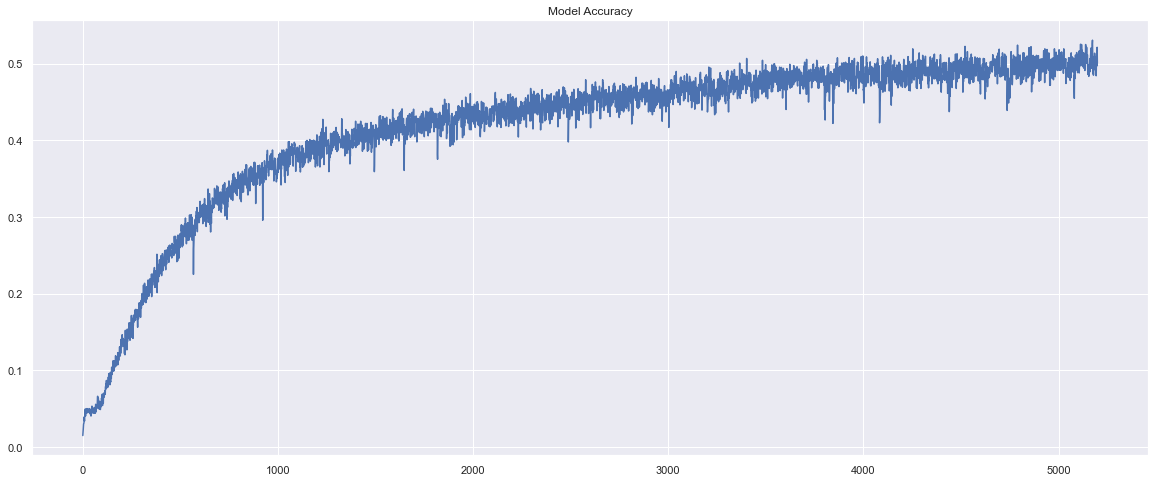

In [26]:
#Accuracy_score graph of model
plt.plot(model3.history.history['accuracy'])
plt.title('Model Accuracy')

<AxesSubplot:>

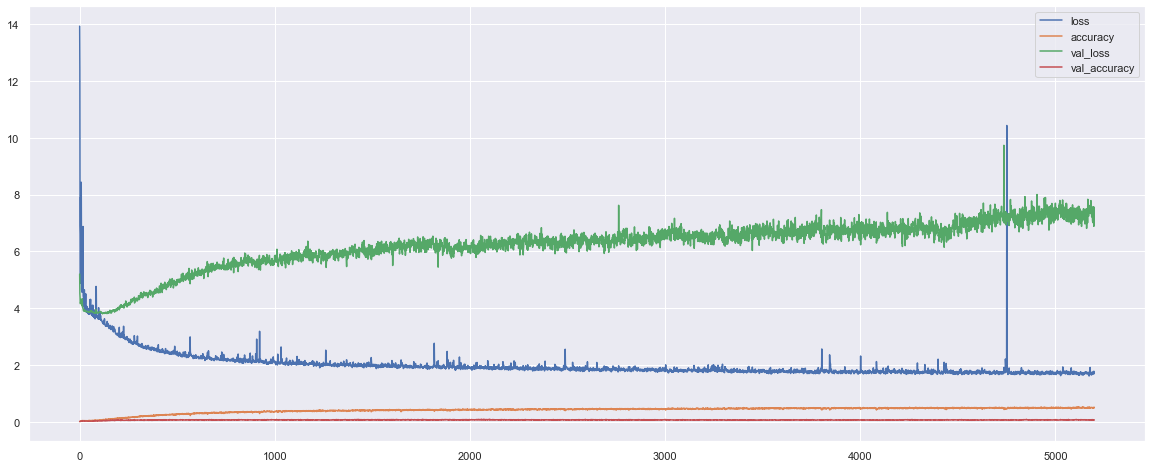

In [27]:
lostData = pd.DataFrame(model3.history.history)
lostData.plot()

## SAVE & LOAD MODEL

In [89]:
#SAVE
model.save("model_eeg.h5")

In [126]:
#LOAD
model_v1_eeg_loaded = tf.keras.models.load_model('model_eeg.h5')